In [1]:
import pickle
import pandas as pd
import sys
sys.path.insert(0, '..') # Needed to import gmmglm
from gmmglm_Copy1 import gmmglm
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
file = open('../regression_files/regression_results/files/best_model', 'rb')

# dump information to that file
best_model = joblib.load(file)#pickle.load(file)

# close the file
file.close()

# Comparative Model Results
These MAVGs are on the test set
- Full covariance, 3 clusters, PCA, Logit. MAVG = 0.704332
- Full covariance, 3 cluster, No PCA, Logit. MAVG = 0.702839
- Full covariance, 3 cluster, No PCA, LogLog. MAVG = 0.719126

Also to check: Cluster w/ sampling,Cluster w/ PCA & sampling, No
clustering 

SAMME.C2 algorithm achieved an MAvG of 0.709

# Best Model

| Train | Valid | Test |
| :- | :- | :- |
| 60% | 20% | 20% | 

| Other | |
| :- | :- |
| PCA | False |  
| Scaling | True | 


| | GMM | 
| :- | :- | 
| Cov | Full | 
| Components | 3 | 
| Variables | Cont + Disc | 


| | GLM | 
| :- | :- | 
| Problem | Classification | 
| Family | Binomial(LogLog) | 
| Metric | MaVG | 
| Scaling | True |
| Poly | 3 | 
| OptCutOff | True | 
| Offset | None | 
| Exposure | None | 
| FreqWeights | False | 
| VarWeights | False | 
| Intercept | True | 
| Sampling | False | 
| Weighted | False | 

# GLM Summary
Cluster 0:
- Variables: Total_miles_driven, I(Years_noclaims ** 3), I(Total_days_driven ** 3), I(Brake_09miles ** 2), I(Brake_11miles ** 3) 
- Correlation: High between total miles and total days
- Remove I(Brake_11miles ** 3), refit.

Cluster 1:
- Remove Insured_age, refit and maybe remove more.

Cluster 2:
- Remove I(Pct_drive_wkday ** 3), refit and maybe remove more.

In [26]:
best_model.get_glm_summary()

Cluster 0:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Claim   No. Observations:                15990
Model:                            GLM   Df Residuals:                    15984
Model Family:                Binomial   Df Model:                            5
Link Function:                 LogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.8
Date:                Mon, 16 Dec 2024   Deviance:                       5815.6
Time:                        23:38:44   Pearson chi2:                 1.39e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            0.04835
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept  

In [11]:
best_model.get_glm_metrics()

+----------------------------------------------------------+
|                        Cluster 0                         |
+-------------------------+----------+------------+--------+
|          Metric         | Training | Validation |  Test  |
+-------------------------+----------+------------+--------+
|         baseline        |  0.9472  |   0.942    | 0.947  |
|           mavg          |  0.7262  |   0.7592   | 0.7339 |
|      accuracy_score     |  0.6738  |   0.6841   | 0.6678 |
| balanced_accuracy_score |  0.7288  |   0.7646   | 0.7381 |
|         f1_score        |  0.2037  |   0.2391   | 0.2067 |
|     precision_score     |  0.1169  |   0.139    | 0.1184 |
|       recall_score      |  0.7903  |   0.8558   | 0.8166 |
|      jaccard_score      |  0.1134  |   0.1358   | 0.1153 |
|   top_k_accuracy_score  |  0.947   |   0.9422   | 0.947  |
| average_precision_score |  0.1414  |   0.1724   | 0.1598 |
|     brier_score_loss    |  0.0478  |   0.0513   | 0.0472 |
|         log_loss      

# Model cleaning

In [31]:
best_model.stepwise_regression_variables

{0: ['Total_miles_driven',
  'I(Years_noclaims ** 3)',
  'I(Total_days_driven ** 3)',
  'I(Brake_09miles ** 2)',
  'I(Brake_11miles ** 3)'],
 1: ['Total_miles_driven',
  'Duration',
  'Insured_age',
  'I(Duration ** 3)',
  'I(Left_turn_intensity09 ** 3)'],
 2: ['I(Total_days_driven ** 3)',
  'Total_miles_driven',
  'Credit_score',
  'I(Brake_12miles ** 3)',
  'I(Car_age ** 3)',
  'I(Duration ** 3)',
  'Right_turn_intensity08',
  'I(Pct_drive_rush ** 3)',
  'Right_turn_intensity11',
  'I(Accel_06miles ** 3)',
  'I(Pct_drive_wkday ** 3)']}

In [22]:
import statsmodels.api as sm

In [36]:
best_model.fit_glm(regression_variables={0: ['Total_miles_driven',
                                      'I(Years_noclaims ** 3)',
                                      'I(Total_days_driven ** 3)',
                                      'I(Brake_09miles ** 2)'],
                                  1: ['Total_miles_driven',
                                      'Duration',
                                      'I(Duration ** 3)',
                                      'I(Left_turn_intensity09 ** 3)'],
                                  2: ['I(Total_days_driven ** 3)',
                                      'Total_miles_driven',
                                      'Credit_score',
                                      'I(Brake_12miles ** 3)',
                                      'I(Car_age ** 3)',
                                      'I(Duration ** 3)',
                                      'Right_turn_intensity08',
                                      'I(Pct_drive_rush ** 3)',
                                      'Right_turn_intensity11',
                                      'I(Accel_06miles ** 3)']}, 
            glm_family=sm.families.Binomial(link=sm.families.links.LogLog()),
            problem_type="classification",
            use_opt_cutoff=True,
            use_sampling=False, 
            sample_size=None, 
            weighted=False, 
            glm_scaling=True,
            offset=None, 
            exposure=None, 
            freq_weights=None, 
            var_weights=None, 
            missing='raise',
            glm_intercept=True,
            glm_kwargs=None,
            fit_kwargs={'start_params':None, 'maxiter':100, 'method':'IRLS', 'tol':1e-08, 'scale':None, 
                        'cov_type':'nonrobust', 'cov_kwds':None, 'use_t':None, 'full_output':True, 
                        'disp':False, 'max_start_irls':3})
    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Claim   No. Observations:                15990
Model:                            GLM   Df Residuals:                    15985
Model Family:                Binomial   Df Model:                            4
Link Function:                 LogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.6
Date:                Tue, 17 Dec 2024   Deviance:                       5817.2
Time:                        02:12:34   Pearson chi2:                 1.39e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            0.04825
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [37]:
best_model.fit_glm(regression_variables={0: ['Total_miles_driven',
                                      'I(Years_noclaims ** 3)',
                                      'I(Total_days_driven ** 3)',
                                      'I(Brake_09miles ** 2)'],
                                  1: ['Total_miles_driven',
                                      'Duration',
                                      'I(Duration ** 3)'],
                                  2: ['I(Total_days_driven ** 3)',
                                      'Total_miles_driven',
                                      'Credit_score',
                                      'I(Brake_12miles ** 3)',
                                      'I(Car_age ** 3)',
                                      'I(Duration ** 3)',
                                      'I(Pct_drive_rush ** 3)',
                                      'Right_turn_intensity11',
                                      'I(Accel_06miles ** 3)']}, 
            glm_family=sm.families.Binomial(link=sm.families.links.LogLog()),
            problem_type="classification",
            use_opt_cutoff=True,
            use_sampling=False, 
            sample_size=None, 
            weighted=False, 
            glm_scaling=True,
            offset=None, 
            exposure=None, 
            freq_weights=None, 
            var_weights=None, 
            missing='raise',
            glm_intercept=True,
            glm_kwargs=None,
            fit_kwargs={'start_params':None, 'maxiter':100, 'method':'IRLS', 'tol':1e-08, 'scale':None, 
                        'cov_type':'nonrobust', 'cov_kwds':None, 'use_t':None, 'full_output':True, 
                        'disp':False, 'max_start_irls':3})

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Claim   No. Observations:                15990
Model:                            GLM   Df Residuals:                    15985
Model Family:                Binomial   Df Model:                            4
Link Function:                 LogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.6
Date:                Tue, 17 Dec 2024   Deviance:                       5817.2
Time:                        02:13:26   Pearson chi2:                 1.39e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            0.04825
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [23]:
best_model.fit_glm(regression_variables={0: ['Total_miles_driven',
                                      'I(Years_noclaims ** 3)',
                                      'I(Total_days_driven ** 3)',
                                      'I(Brake_09miles ** 2)'],
                                  1: ['Total_miles_driven',
                                      'Duration'],
                                  2: ['I(Total_days_driven ** 3)',
                                      'Total_miles_driven',
                                      'Credit_score',
                                      'I(Brake_12miles ** 3)',
                                      'I(Car_age ** 3)',
                                      'I(Duration ** 3)',
                                      'Right_turn_intensity11',
                                      'I(Accel_06miles ** 3)']}, 
            glm_family=sm.families.Binomial(link=sm.families.links.LogLog()),
            problem_type="classification",
            use_opt_cutoff=True,
            use_sampling=False, 
            sample_size=None, 
            weighted=False, 
            glm_scaling=True,
            offset=None, 
            exposure=None, 
            freq_weights=None, 
            var_weights=None, 
            missing='raise',
            glm_intercept=True,
            glm_kwargs=None,
            fit_kwargs={'start_params':None, 'maxiter':100, 'method':'IRLS', 'tol':1e-08, 'scale':None, 
                        'cov_type':'nonrobust', 'cov_kwds':None, 'use_t':None, 'full_output':True, 
                        'disp':False, 'max_start_irls':3})

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Claim   No. Observations:                15990
Model:                            GLM   Df Residuals:                    15985
Model Family:                Binomial   Df Model:                            4
Link Function:                 LogLog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.6
Date:                Mon, 13 Jan 2025   Deviance:                       5817.2
Time:                        20:00:28   Pearson chi2:                 1.39e+04
No. Iterations:                     9   Pseudo R-squ. (CS):            0.04825
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [39]:
print(np.round(best_model.clust0_glm_cutoff,5))
print(np.round(best_model.clust1_glm_cutoff,5))
print(np.round(best_model.clust2_glm_cutoff,5))

0.04354
0.06147
0.03595


In [40]:
best_model.glm_metric(y_true=best_model.df_test["Claim"].values, 
               y_pred=best_model.glm_test_pred_class, 
               metric="mavg", problem_type="classification")

0.7166469476560015

# Checks

In [13]:
print(best_model.random_state)
print(best_model.continuous_variables)
print(best_model.discrete_variables)
print(best_model.nominal_variables)
print(best_model.target_variable)
print(best_model.drop_variables)
print(best_model.train_set)
print(best_model.valid_set)
print(best_model.test_set)

16430792
['Pct_drive_3hrs', 'Pct_drive_rush', 'Pct_drive_2hrs', 'Pct_drive_4hrs', 'Pct_drive_wkday', 'Total_miles_driven']
['Accel_11miles', 'Insured_age', 'Total_days_driven', 'Left_turn_intensity11', 'Left_turn_intensity08', 'Right_turn_intensity08', 'Accel_08miles', 'Brake_06miles', 'Left_turn_intensity10', 'Accel_09miles', 'Duration', 'Brake_12miles', 'Brake_14miles', 'Brake_08miles', 'Right_turn_intensity10', 'Brake_09miles', 'Left_turn_intensity09', 'Accel_14miles', 'Car_age', 'Years_noclaims', 'Credit_score', 'Left_turn_intensity12', 'Right_turn_intensity12', 'Accel_12miles', 'Right_turn_intensity09', 'Right_turn_intensity11', 'Brake_11miles', 'Accel_06miles']
['Car_use_nominal', 'Marital_nominal', 'Insured_sex_nominal', 'Region_nominal']
['Claim']
['NB_Claim', 'AMT_Claim', 'Pct_drive_wkend', 'Pct_drive_mon', 'Pct_drive_tue', 'Pct_drive_wed', 'Pct_drive_thr', 'Pct_drive_fri', 'Pct_drive_sat', 'Pct_drive_sun', 'Pct_drive_rush_am', 'Pct_drive_rush_pm', 'Annual_pct_driven', 'Annual

In [31]:
sorted(best_model.discrete_variables)

['Accel_06miles',
 'Accel_08miles',
 'Accel_09miles',
 'Accel_11miles',
 'Accel_12miles',
 'Accel_14miles',
 'Brake_06miles',
 'Brake_08miles',
 'Brake_09miles',
 'Brake_11miles',
 'Brake_12miles',
 'Brake_14miles',
 'Car_age',
 'Credit_score',
 'Duration',
 'Insured_age',
 'Left_turn_intensity08',
 'Left_turn_intensity09',
 'Left_turn_intensity10',
 'Left_turn_intensity11',
 'Left_turn_intensity12',
 'Right_turn_intensity08',
 'Right_turn_intensity09',
 'Right_turn_intensity10',
 'Right_turn_intensity11',
 'Right_turn_intensity12',
 'Total_days_driven',
 'Years_noclaims']

In [32]:
sorted(best_model.continuous_variables)

['Pct_drive_2hrs',
 'Pct_drive_3hrs',
 'Pct_drive_4hrs',
 'Pct_drive_rush',
 'Pct_drive_wkday',
 'Total_miles_driven']

In [30]:
sorted(best_model.drop_variables)

['AMT_Claim',
 'Annual_miles_drive',
 'Annual_pct_driven',
 'Avgdays_week',
 'NB_Claim',
 'Pct_drive_fri',
 'Pct_drive_mon',
 'Pct_drive_rush_am',
 'Pct_drive_rush_pm',
 'Pct_drive_sat',
 'Pct_drive_sun',
 'Pct_drive_thr',
 'Pct_drive_tue',
 'Pct_drive_wed',
 'Pct_drive_wkend',
 'Territory_nominal']

In [27]:
sorted(best_model.cluster_variables)

['Accel_06miles',
 'Accel_08miles',
 'Accel_09miles',
 'Accel_11miles',
 'Accel_12miles',
 'Accel_14miles',
 'Brake_06miles',
 'Brake_08miles',
 'Brake_09miles',
 'Brake_11miles',
 'Brake_12miles',
 'Brake_14miles',
 'Car_age',
 'Credit_score',
 'Duration',
 'Insured_age',
 'Left_turn_intensity08',
 'Left_turn_intensity09',
 'Left_turn_intensity10',
 'Left_turn_intensity11',
 'Left_turn_intensity12',
 'Pct_drive_2hrs',
 'Pct_drive_3hrs',
 'Pct_drive_4hrs',
 'Pct_drive_rush',
 'Pct_drive_wkday',
 'Right_turn_intensity08',
 'Right_turn_intensity09',
 'Right_turn_intensity10',
 'Right_turn_intensity11',
 'Right_turn_intensity12',
 'Total_days_driven',
 'Total_miles_driven',
 'Years_noclaims']

In [29]:
best_model.df['Total_days_driven']

0        310
1        171
2        190
3         25
4        161
        ... 
99995     60
99996     62
99997     43
99998    174
99999    154
Name: Total_days_driven, Length: 100000, dtype: int64

In [24]:
best_model.mu.apply(lambda x: f"{x:.5f}")[best_model.cluster_variables]

Pct_drive_3hrs               0.00088
Pct_drive_rush               0.23533
Pct_drive_2hrs               0.00396
Pct_drive_4hrs               0.00025
Pct_drive_wkday              0.74977
Total_miles_driven        4836.45080
Accel_11miles                0.95292
Insured_age                 51.30955
Total_days_driven          183.67833
Left_turn_intensity11      526.45472
Left_turn_intensity08      954.91065
Right_turn_intensity08     830.19538
Accel_08miles                4.56255
Brake_06miles               83.68538
Left_turn_intensity10      590.82728
Accel_09miles                1.78133
Duration                   314.49212
Brake_12miles                0.60262
Brake_14miles                0.36168
Brake_08miles                9.60810
Right_turn_intensity10     327.20955
Brake_09miles                3.11530
Left_turn_intensity09      761.76123
Accel_14miles                0.36383
Car_age                      5.64905
Years_noclaims              28.74765
Credit_score               800.65172
L

In [45]:
a = np.round(best_model.df_train[best_model.clust_train_preds==0][sorted(best_model.cluster_variables)].mean(),2)

b = np.round(best_model.df_train[best_model.clust_train_preds==1][sorted(best_model.cluster_variables)].mean(),2)

c = np.round(best_model.df_train[best_model.clust_train_preds==2][sorted(best_model.cluster_variables)].mean(),2)

In [14]:
best_model.mu.apply(lambda x: f"{x:.5f}")

Pct_drive_3hrs               0.00088
Pct_drive_rush               0.23533
Pct_drive_2hrs               0.00396
Pct_drive_4hrs               0.00025
Pct_drive_wkday              0.74977
Total_miles_driven        4836.45080
Accel_11miles                0.95292
Insured_age                 51.30955
Total_days_driven          183.67833
Left_turn_intensity11      526.45472
Left_turn_intensity08      954.91065
Right_turn_intensity08     830.19538
Accel_08miles                4.56255
Brake_06miles               83.68538
Left_turn_intensity10      590.82728
Accel_09miles                1.78133
Duration                   314.49212
Brake_12miles                0.60262
Brake_14miles                0.36168
Brake_08miles                9.60810
Right_turn_intensity10     327.20955
Brake_09miles                3.11530
Left_turn_intensity09      761.76123
Accel_14miles                0.36383
Car_age                      5.64905
Years_noclaims              28.74765
Credit_score               800.65172
L

In [15]:
best_model.sigma.apply(lambda x: f"{x:.5f}")

Pct_drive_3hrs                0.00423
Pct_drive_rush                0.12206
Pct_drive_2hrs                0.00844
Pct_drive_4hrs                0.00269
Pct_drive_wkday               0.08271
Total_miles_driven         4565.29284
Accel_11miles                12.41200
Insured_age                  15.45853
Total_days_driven           109.41232
Left_turn_intensity11     14579.77380
Left_turn_intensity08     16596.46576
Right_turn_intensity08    11585.63940
Accel_08miles                19.87896
Brake_06miles                80.27859
Left_turn_intensity10     15020.01350
Accel_09miles                14.97712
Duration                     79.62489
Brake_12miles                 9.42752
Brake_14miles                 8.53713
Brake_08miles                18.40299
Right_turn_intensity10     9534.54651
Brake_09miles                12.82980
Left_turn_intensity09     16018.40527
Accel_14miles                 8.69940
Car_age                       4.07233
Years_noclaims               16.10781
Credit_score

In [ ]:
#best_model.exploratory_data_analysis()
# slow

In [16]:
best_model.correlation(list_of_vars=None, kwargs={})

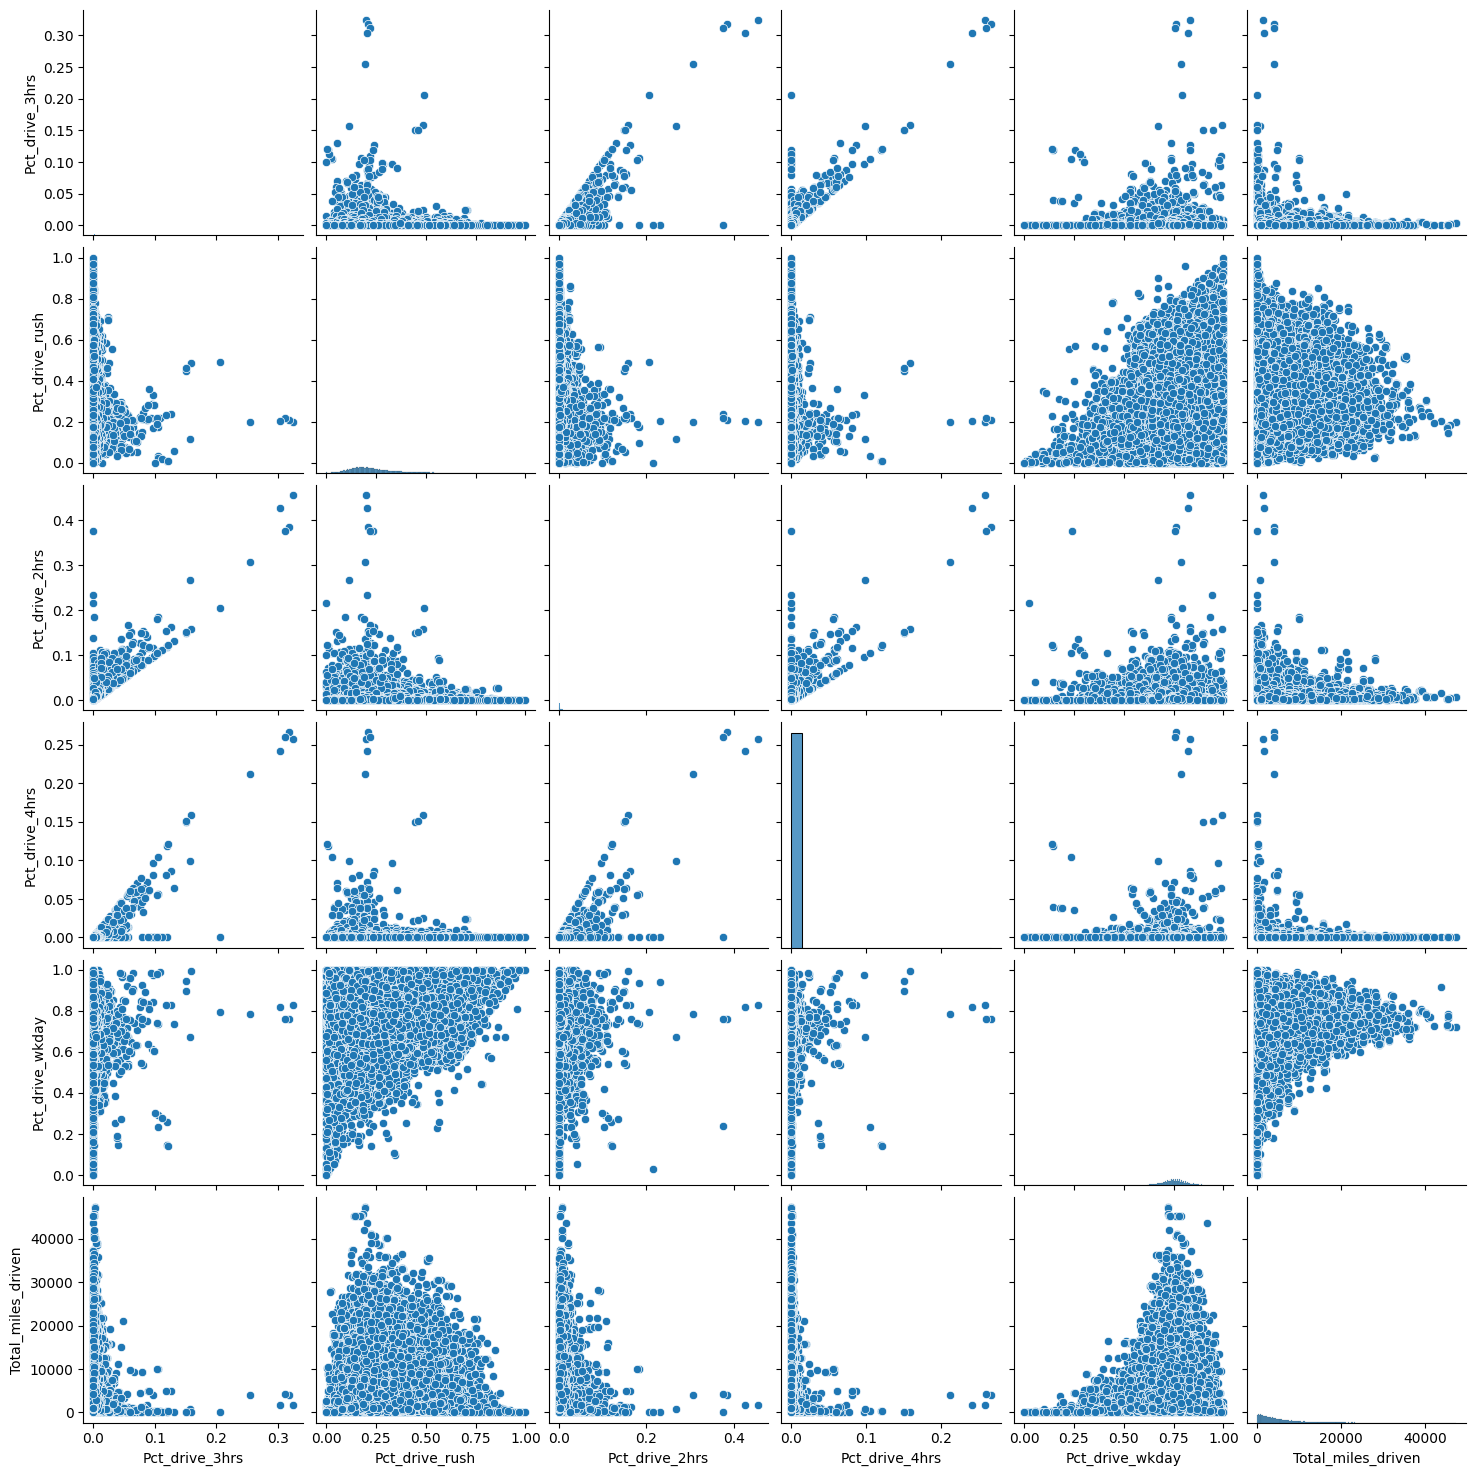

In [18]:
best_model.pairs_plot(list_of_vars=best_model.continuous_variables, kwargs={})

In [87]:
pd.options.display.float_format = '{:.2f}'.format
sorted(best_model.cluster_variables)

['Accel_06miles',
 'Accel_08miles',
 'Accel_09miles',
 'Accel_11miles',
 'Accel_12miles',
 'Accel_14miles',
 'Brake_06miles',
 'Brake_08miles',
 'Brake_09miles',
 'Brake_11miles',
 'Brake_12miles',
 'Brake_14miles',
 'Car_age',
 'Credit_score',
 'Duration',
 'Insured_age',
 'Left_turn_intensity08',
 'Left_turn_intensity09',
 'Left_turn_intensity10',
 'Left_turn_intensity11',
 'Left_turn_intensity12',
 'Pct_drive_2hrs',
 'Pct_drive_3hrs',
 'Pct_drive_4hrs',
 'Pct_drive_rush',
 'Pct_drive_wkday',
 'Right_turn_intensity08',
 'Right_turn_intensity09',
 'Right_turn_intensity10',
 'Right_turn_intensity11',
 'Right_turn_intensity12',
 'Total_days_driven',
 'Total_miles_driven',
 'Years_noclaims']

In [ ]:
from scipy.stats import norm, gmean, chi2, shapiro, kstest,

In [89]:
best_model.df_train

index  Duration  Insured_age  Car_age  Credit_score  \
0          0       366           45       -1           609   
1          1       182           44        3           575   
2          2       184           48        6           847   
3          3       183           71        6           842   
4          4       183           84       10           856   
...      ...       ...          ...      ...           ...   
59995  99992       221           34       10           894   
59996  99994       366           65        7           815   
59997  99995       182           61       10           824   
59998  99997       184           50        2           650   
59999  99998       184           76        2           811   

       Annual_miles_drive  Years_noclaims Territory_nominal  \
0                 6213.71              25                70   
1                12427.42              20                26   
2                12427.42              14                84   
3                 6213.71              43                30   
4                 6213.71              65                70   
...                   ...             ...               ...   
59995            12427.42              17                82   
59996             6213.71              20                13   
59997             6213.71              42                32   
59998             6213.71              31                71   
59999             6213.71              58                87   

       Annual_pct_driven  Total_miles_driven  ...  Right_turn_intensity12  \
0                   0.85             8864.38  ...                       0   
1                   0.47             8092.31  ...                      40   
2                   0.52             3225.83  ...                       0   
3                   0.07              253.02  ...                       0   
4                   0.44             4374.38  ...                       2   
...                  ...                 ...  ...                     ...   
59995               0.18             2174.12  ...                       3   
59996               0.10             1046.93  ...                       7   
59997               0.16              903.23  ...                       0   
59998               0.12              935.54  ...                       0   
59999               0.47             4287.60  ...                       0   

       NB_Claim  AMT_Claim  Insured_sex_nominal  Marital_nominal  \
0             1    5100.17                    1                0   
1             1     883.55                    0                0   
2             0       0.00                    0                0   
3             0       0.00                    1                0   
4             0       0.00                    1                0   
...         ...        ...                  ...              ...   
59995         0       0.00                    1                1   
59996         0       0.00                    1                0   
59997         0       0.00                    1                1   
59998         0       0.00                    1                1   
59999         0       0.00                    1                0   

       Car_use_nominal  Region_nominal  Pct_drive_rush  Total_days_driven  \
0                    1               1            0.43                310   
1                    1               1            0.31                171   
2                    1               1            0.17                190   
3                    3               1            0.22                 25   
4                    3               1            0.17                161   
...                ...             ...             ...                ...   
59995                1               1            0.35                 67   
59996                3               1            0.26                 38   
59997                3               1            0.13                

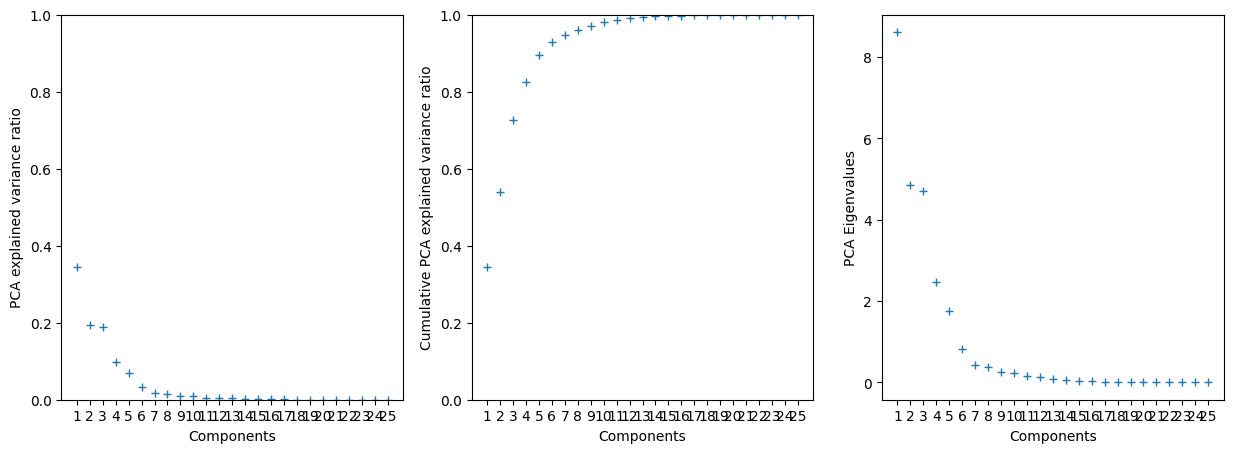

In [95]:
best_model_pca.get_pca_summary()

In [111]:
best_model_pca.loading_matrix

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  \
Pct_drive_2hrs         -0.04  0.00 -0.01  0.86  0.02  0.02  0.46  0.18  0.00   
Pct_drive_3hrs         -0.01 -0.01 -0.01  0.95  0.13 -0.00 -0.06 -0.03  0.00   
Pct_drive_4hrs         -0.01 -0.00 -0.01  0.88  0.15 -0.03 -0.38 -0.12 -0.00   
Accel_06miles           0.44 -0.00  0.01 -0.12  0.75  0.29 -0.10  0.32 -0.02   
Accel_08miles           0.81 -0.00 -0.00 -0.03  0.26  0.49  0.03 -0.07  0.00   
Accel_09miles           0.91 -0.00 -0.00  0.01  0.03  0.35  0.05 -0.16  0.01   
Accel_11miles           0.94 -0.00 -0.00  0.03 -0.11  0.17  0.04 -0.13  0.01   
Accel_12miles           0.96 -0.00 -0.00  0.04 -0.22  0.02 -0.03  0.04  0.01   
Accel_14miles           0.92 -0.00 -0.00  0.04 -0.28 -0.12 -0.09  0.20 -0.00   
Brake_06miles           0.34  0.01  0.00 -0.14  0.79 -0.40  0.01  0.03  0.01   
Brake_08miles           0.80  0.00 -0.00 -0.05  0.40 -0.32  0.12 -0.20 -0.01   
Brake_09miles           0.95 -0.00 -0.00  0.01  0.06 -0.16  0.09 -0.16 -0.01   
Brake_11miles           0.96 -0.00 -0.00  0.02 -0.14 -0.12  0.01 -0.02 -0.01   
Brake_12miles           0.95 -0.00 -0.00  0.04 -0.24 -0.12 -0.05  0.10 -0.00   
Brake_14miles           0.91 -0.00 -0.00  0.04 -0.29 -0.14 -0.09  0.22 -0.00   
Left_turn_intensity08   0.00  0.93 -0.29 -0.00  0.00  0.00 -0.00  0.00  0.00   
Left_turn_intensity09   0.00  0.94 -0.29 -0.00  0.00  0.00 -0.00  0.00  0.00   
Left_turn_intensity10   0.00  0.95 -0.30  0.00 -0.00  0.00 -0.00 -0.00 -0.00   
Left_turn_intensity11   0.00  0.94 -0.30  0.00 -0.00  0.00  0.00 -0.00 -0.00   
Left_turn_intensity12   0.00  0.93 -0.30  0.00 -0.00  0.00  0.00 -0.00 -0.00   
Right_turn_intensity08  0.01  0.29  0.89  0.00  0.01 -0.00 -0.01  0.01  0.33   
Right_turn_intensity09  0.01  0.30  0.93  0.00  0.00 -0.00 -0.00  0.00  0.20   
Right_turn_intensity10  0.00  0.31  0.94  0.01 -0.01  0.00  0.00 -0.00 -0.09   
Right_turn_intensity11  0.00  0.30  0.93  0.01 -0.01  0.00  0.00 -0.00 -0.19   
Right_turn_intensity12  0.00  0.30  0.92  0.01 -0.01  0.00  0.00 -0.00 -0.25   

                        PC10  ...  PC16  PC17  PC18  PC19  PC20  PC21  PC22  \
Pct_drive_2hrs          0.02  ...  0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00   
Pct_drive_3hrs         -0.00  ... -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
Pct_drive_4hrs         -0.01  ... -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00   
Accel_06miles          -0.15  ... -0.00  0.01 -0.01 -0.00  0.00  0.00 -0.00   
Accel_08miles          -0.00  ... -0.00 -0.04  0.02  0.01 -0.00 -0.00  0.00   
Accel_09miles           0.12  ...  0.00  0.08 -0.04 -0.01  0.00  0.00 -0.00   
Accel_11miles           0.14  ... -0.00 -0.06  0.01 -0.03  0.00 -0.00 -0.01   
Accel_12miles           0.12  ... -0.00  0.01 -0.00  0.05 -0.00  0.00  0.01   
Accel_14miles           0.02  ... -0.00  0.04  0.07 -0.02  0.00 -0.00 -0.02   
Brake_06miles           0.28  ... -0.00 -0.00  0.01  0.00  0.00  0.00 -0.00   
Brake_08miles          -0.16  ...  0.00 -0.00 -0.02 -0.02  0.00 -0.00 -0.00   
Brake_09miles          -0.17  ... -0.00  0.01  0.04  0.03 -0.00  0.00  0.01   
Brake_11miles          -0.10  ... -0.00 -0.00 -0.02 -0.00  0.00  0.00 -0.03   
Brake_12miles          -0.03  ... -0.00 -0.00 -0.01 -0.03  0.00 -0.00  0.04   
Brake_14miles           0.02  ...  0.00 -0.03 -0.06  0.02 -0.00  0.00 -0.01   
Left_turn_intensity08   0.00  ...  0.00  0.00 -0.00 -0.00 -0.00 -0.03 -0.00   
Left_turn_intensity09   0.00  ... -0.00 -0.00  0.00  0.00  0.00  0.00  0.00   
Left_turn_intensity10  -0.00  ... -0.00 -0.00  0.00  0.00  0.01  0.06  0.00   
Left_turn_intensity11  -0.00  ...  0.00  0.00 -0.00  0.00  0.00  0.01 -0.00   
Left_turn_intensity12  -0.00  ...  0.00  0.00 -0.00 -0.00 -0.01 -0.05 -0.00   
Right_turn_intensity08 -0.02  ...  0.06 -0.00  0.00 -0.00 -0.03  0.01  0.00   
Right_turn_intensity09 -0.01  ... -0.04  0.00 -0.00  0.00  0.06 -0.01 -0.00   
Right_turn_intensity10  0.00  ... -0.07  0.00 -0.00 -0.00 -0.02  0.00 -0.00   
Right_turn_intensity11  0.01  ... -0.02  0.00 -0


 Accel_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.60     0.00  Reject Null
1  Kolmogorov-Smirnov       0.24     0.00  Reject Null
2         Jarque-Bera 1667246.85     0.00  Reject Null
3             Omnibus   51741.71     0.00  Reject Null
4    Anderson-Darling    6031.49     1.09  Reject Null


 Accel_08miles


Test    Statistic  P-Value   Conclusion
0       Shapiro-Wilks         0.17     0.00  Reject Null
1  Kolmogorov-Smirnov         0.41     0.00  Reject Null
2         Jarque-Bera 532607889.29     0.00  Reject Null
3             Omnibus    126147.18     0.00  Reject Null
4    Anderson-Darling     15233.35     1.09  Reject Null


 Accel_09miles


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.07     0.00  Reject Null
1  Kolmogorov-Smirnov          0.45     0.00  Reject Null
2         Jarque-Bera 3045951997.54     0.00  Reject Null
3             Omnibus     156437.19     0.00  Reject Null
4    Anderson-Darling      18576.42     1.09  Reject Null


 Accel_11miles


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.04     0.00  Reject Null
1  Kolmogorov-Smirnov          0.47     0.00  Reject Null
2         Jarque-Bera 7490918782.53     0.00  Reject Null
3             Omnibus     172153.26     0.00  Reject Null
4    Anderson-Darling      20117.25     1.09  Reject Null


 Accel_12miles


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.02     0.00  Reject Null
1  Kolmogorov-Smirnov           0.48     0.00  Reject Null
2         Jarque-Bera 15113041300.95     0.00  Reject Null
3             Omnibus      183371.57     0.00  Reject Null
4    Anderson-Darling       21225.19     1.09  Reject Null


 Accel_14miles


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.02     0.00  Reject Null
1  Kolmogorov-Smirnov           0.48     0.00  Reject Null
2         Jarque-Bera 32530332455.30     0.00  Reject Null
3             Omnibus      197080.35     0.00  Reject Null
4    Anderson-Darling       21775.99     1.09  Reject Null


 Brake_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.75     0.00  Reject Null
1  Kolmogorov-Smirnov       0.16     0.00  Reject Null
2         Jarque-Bera  337959.45     0.00  Reject Null
3             Omnibus   34697.01     0.00  Reject Null
4    Anderson-Darling    3498.78     1.09  Reject Null


 Brake_08miles


Test    Statistic  P-Value   Conclusion
0       Shapiro-Wilks         0.32     0.00  Reject Null
1  Kolmogorov-Smirnov         0.30     0.00  Reject Null
2         Jarque-Bera 519527407.49     0.00  Reject Null
3             Omnibus    122514.87     0.00  Reject Null
4    Anderson-Darling      8649.49     1.09  Reject Null


 Brake_09miles


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.11     0.00  Reject Null
1  Kolmogorov-Smirnov          0.40     0.00  Reject Null
2         Jarque-Bera 5008635863.84     0.00  Reject Null
3             Omnibus     163569.08     0.00  Reject Null
4    Anderson-Darling      14852.45     1.09  Reject Null


 Brake_11miles


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.05     0.00  Reject Null
1  Kolmogorov-Smirnov           0.45     0.00  Reject Null
2         Jarque-Bera 11141917672.64     0.00  Reject Null
3             Omnibus      178558.75     0.00  Reject Null
4    Anderson-Darling       18423.85     1.09  Reject Null


 Brake_12miles


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.02     0.00  Reject Null
1  Kolmogorov-Smirnov           0.47     0.00  Reject Null
2         Jarque-Bera 19716005350.03     0.00  Reject Null
3             Omnibus      188242.51     0.00  Reject Null
4    Anderson-Darling       20503.28     1.09  Reject Null


 Brake_14miles


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.01     0.00  Reject Null
1  Kolmogorov-Smirnov           0.48     0.00  Reject Null
2         Jarque-Bera 35559089466.03     0.00  Reject Null
3             Omnibus      199164.40     0.00  Reject Null
4    Anderson-Darling       21639.42     1.09  Reject Null


 Car_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.96     0.00  Reject Null
1  Kolmogorov-Smirnov       0.10     0.00  Reject Null
2         Jarque-Bera    2818.56     0.00  Reject Null
3             Omnibus    2963.62     0.00  Reject Null
4    Anderson-Darling     602.84     1.09  Reject Null


 Credit_score


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.88     0.00  Reject Null
1  Kolmogorov-Smirnov       0.14     0.00  Reject Null
2         Jarque-Bera   28781.69     0.00  Reject Null
3             Omnibus   13985.96     0.00  Reject Null
4    Anderson-Darling    2039.31     1.09  Reject Null


 Duration


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.60     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera   12145.94     0.00  Reject Null
3             Omnibus   19192.07     0.00  Reject Null
4    Anderson-Darling   12075.54     1.09  Reject Null


 Insured_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.98     0.00  Reject Null
1  Kolmogorov-Smirnov       0.05     0.00  Reject Null
2         Jarque-Bera    1874.25     0.00  Reject Null
3             Omnibus    6959.60     0.00  Reject Null
4    Anderson-Darling     246.71     1.09  Reject Null


 Left_turn_intensity08


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.02     0.00  Reject Null
1  Kolmogorov-Smirnov          0.48     0.00  Reject Null
2         Jarque-Bera 2177404293.41     0.00  Reject Null
3             Omnibus     152971.43     0.00  Reject Null
4    Anderson-Darling      21853.98     1.09  Reject Null


 Left_turn_intensity09


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.02     0.00  Reject Null
1  Kolmogorov-Smirnov          0.48     0.00  Reject Null
2         Jarque-Bera 2475317984.56     0.00  Reject Null
3             Omnibus     154810.43     0.00  Reject Null
4    Anderson-Darling      22421.68     1.09  Reject Null


 Left_turn_intensity10


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.02     0.00  Reject Null
1  Kolmogorov-Smirnov          0.49     0.00  Reject Null
2         Jarque-Bera 3406535787.19     0.00  Reject Null
3             Omnibus     159632.58     0.00  Reject Null
4    Anderson-Darling      22848.53     1.09  Reject Null


 Left_turn_intensity11


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.01     0.00  Reject Null
1  Kolmogorov-Smirnov          0.50     0.00  Reject Null
2         Jarque-Bera 3986850798.73     0.00  Reject Null
3             Omnibus     162241.56     0.00  Reject Null
4    Anderson-Darling      22972.29     1.09  Reject Null


 Left_turn_intensity12


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.01     0.00  Reject Null
1  Kolmogorov-Smirnov          0.50     0.00  Reject Null
2         Jarque-Bera 4420654370.03     0.00  Reject Null
3             Omnibus     163811.93     0.00  Reject Null
4    Anderson-Darling      23035.61     1.09  Reject Null


 Pct_drive_2hrs


Test    Statistic  P-Value   Conclusion
0       Shapiro-Wilks         0.43     0.00  Reject Null
1  Kolmogorov-Smirnov         0.32     0.00  Reject Null
2         Jarque-Bera 568371270.33     0.00  Reject Null
3             Omnibus    112212.80     0.00  Reject Null
4    Anderson-Darling      7899.46     1.09  Reject Null


 Pct_drive_3hrs


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.16     0.00  Reject Null
1  Kolmogorov-Smirnov           0.42     0.00  Reject Null
2         Jarque-Bera 10092098078.33     0.00  Reject Null
3             Omnibus      163935.99     0.00  Reject Null
4    Anderson-Darling       14688.51     1.09  Reject Null


 Pct_drive_4hrs


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.05     0.00  Reject Null
1  Kolmogorov-Smirnov           0.46     0.00  Reject Null
2         Jarque-Bera 60600068083.27     0.00  Reject Null
3             Omnibus      200420.68     0.00  Reject Null
4    Anderson-Darling       19464.66     1.09  Reject Null


 Pct_drive_rush


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.09     0.00  Reject Null
2         Jarque-Bera   23233.64     0.00  Reject Null
3             Omnibus   11612.68     0.00  Reject Null
4    Anderson-Darling    1047.73     1.09  Reject Null


 Pct_drive_wkday


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.07     0.00  Reject Null
2         Jarque-Bera  118647.68     0.00  Reject Null
3             Omnibus   16471.85     0.00  Reject Null
4    Anderson-Darling     627.25     1.09  Reject Null


 Right_turn_intensity08


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.02     0.00  Reject Null
1  Kolmogorov-Smirnov           0.47     0.00  Reject Null
2         Jarque-Bera 13005423060.18     0.00  Reject Null
3             Omnibus      180549.32     0.00  Reject Null
4    Anderson-Darling       20340.88     1.09  Reject Null


 Right_turn_intensity09


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.02     0.00  Reject Null
1  Kolmogorov-Smirnov           0.48     0.00  Reject Null
2         Jarque-Bera 18095275368.08     0.00  Reject Null
3             Omnibus      185432.42     0.00  Reject Null
4    Anderson-Darling       21353.38     1.09  Reject Null


 Right_turn_intensity10


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.01     0.00  Reject Null
1  Kolmogorov-Smirnov           0.49     0.00  Reject Null
2         Jarque-Bera 34501832876.25     0.00  Reject Null
3             Omnibus      196514.05     0.00  Reject Null
4    Anderson-Darling       22345.95     1.09  Reject Null


 Right_turn_intensity11


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.01     0.00  Reject Null
1  Kolmogorov-Smirnov           0.49     0.00  Reject Null
2         Jarque-Bera 43282326833.41     0.00  Reject Null
3             Omnibus      200829.57     0.00  Reject Null
4    Anderson-Darling       22716.95     1.09  Reject Null


 Right_turn_intensity12


Test      Statistic  P-Value   Conclusion
0       Shapiro-Wilks           0.01     0.00  Reject Null
1  Kolmogorov-Smirnov           0.49     0.00  Reject Null
2         Jarque-Bera 56430938958.57     0.00  Reject Null
3             Omnibus      205794.55     0.00  Reject Null
4    Anderson-Darling       22916.05     1.09  Reject Null


 Total_days_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.94     0.00  Reject Null
1  Kolmogorov-Smirnov       0.10     0.00  Reject Null
2         Jarque-Bera    3530.03     0.00  Reject Null
3             Omnibus   22429.04     0.00  Reject Null
4    Anderson-Darling    1013.34     1.09  Reject Null


 Total_miles_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.84     0.00  Reject Null
1  Kolmogorov-Smirnov       0.14     0.00  Reject Null
2         Jarque-Bera   90841.55     0.00  Reject Null
3             Omnibus   22144.88     0.00  Reject Null
4    Anderson-Darling    2470.28     1.09  Reject Null


 Years_noclaims


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.97     0.00  Reject Null
1  Kolmogorov-Smirnov       0.07     0.00  Reject Null
2         Jarque-Bera    2393.86     0.00  Reject Null
3             Omnibus    9470.20     0.00  Reject Null
4    Anderson-Darling     433.54     1.09  Reject Null

Data is too large for multivariate tests. Performing on a sample of 2000.


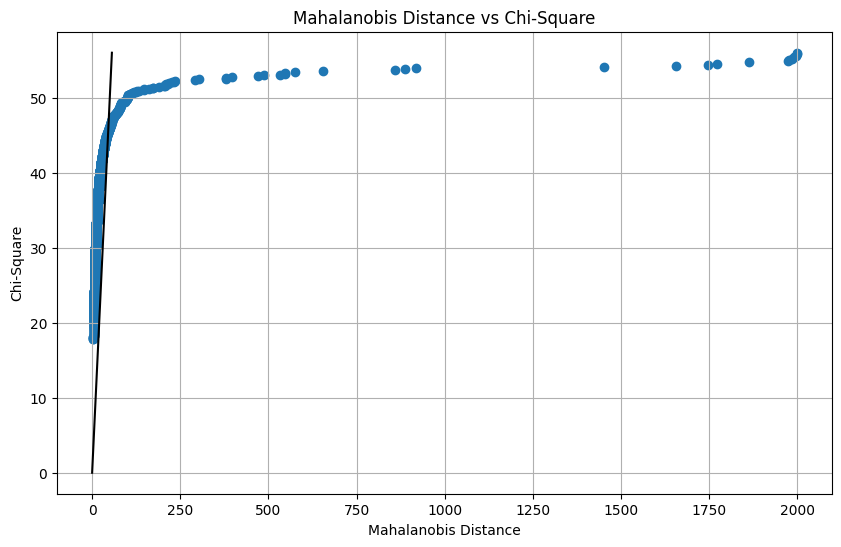

Test  Statistic  P-Value   Conclusion
0    Henze-Zirkler       5.22     0.00  Reject Null
1          Royston    4139.75     0.00  Reject Null
2      Mardia Skew 7205584.58     0.00  Reject Null
3  Mardia Kurtosis   10559.31     0.00  Reject Null
4           Mardia        NaN      NaN  Reject Null

Cluster  0

 Accel_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.78     0.00  Reject Null
1  Kolmogorov-Smirnov       0.25     0.00  Reject Null
2         Jarque-Bera   39487.36     0.00  Reject Null
3             Omnibus    7296.32     0.00  Reject Null
4    Anderson-Darling     932.76     1.09  Reject Null


 Accel_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.55     0.00  Reject Null
1  Kolmogorov-Smirnov       0.41     0.00  Reject Null
2         Jarque-Bera  377363.66     0.00  Reject Null
3             Omnibus   13712.48     0.00  Reject Null
4    Anderson-Darling    2085.37     1.09  Reject Null


 Accel_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.50     0.00  Reject Null
1  Kolmogorov-Smirnov       0.45     0.00  Reject Null
2         Jarque-Bera  590076.06     0.00  Reject Null
3             Omnibus   15015.00     0.00  Reject Null
4    Anderson-Darling    2353.61     1.09  Reject Null


 Accel_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.53     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera  256724.23     0.00  Reject Null
3             Omnibus   12708.34     0.00  Reject Null
4    Anderson-Darling    2411.47     1.09  Reject Null


 Accel_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.46     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera  496437.74     0.00  Reject Null
3             Omnibus   14650.48     0.00  Reject Null
4    Anderson-Darling    2769.12     1.09  Reject Null


 Accel_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.37     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera  953376.91     0.00  Reject Null
3             Omnibus   16799.52     0.00  Reject Null
4    Anderson-Darling    3411.81     1.09  Reject Null


 Brake_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.83     0.00  Reject Null
1  Kolmogorov-Smirnov       0.17     0.00  Reject Null
2         Jarque-Bera   17811.53     0.00  Reject Null
3             Omnibus    5532.71     0.00  Reject Null
4    Anderson-Darling     745.31     1.09  Reject Null


 Brake_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.71     0.00  Reject Null
1  Kolmogorov-Smirnov       0.31     0.00  Reject Null
2         Jarque-Bera  130395.37     0.00  Reject Null
3             Omnibus   10287.78     0.00  Reject Null
4    Anderson-Darling    1156.06     1.09  Reject Null


 Brake_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.69     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera  199244.73     0.00  Reject Null
3             Omnibus   11230.78     0.00  Reject Null
4    Anderson-Darling    1242.68     1.09  Reject Null


 Brake_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.65     0.00  Reject Null
1  Kolmogorov-Smirnov       0.45     0.00  Reject Null
2         Jarque-Bera  141176.54     0.00  Reject Null
3             Omnibus   10752.05     0.00  Reject Null
4    Anderson-Darling    1700.90     1.09  Reject Null


 Brake_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.52     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera  477234.91     0.00  Reject Null
3             Omnibus   14346.72     0.00  Reject Null
4    Anderson-Darling    2143.50     1.09  Reject Null


 Brake_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.41     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera 1041387.02     0.00  Reject Null
3             Omnibus   16923.05     0.00  Reject Null
4    Anderson-Darling    2922.03     1.09  Reject Null


 Car_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.98     0.00  Reject Null
1  Kolmogorov-Smirnov       0.11     0.00  Reject Null
2         Jarque-Bera     468.73     0.00  Reject Null
3             Omnibus     730.99     0.00  Reject Null
4    Anderson-Darling     106.18     1.09  Reject Null


 Credit_score


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.89     0.00  Reject Null
1  Kolmogorov-Smirnov       0.12     0.00  Reject Null
2         Jarque-Bera    6508.48     0.00  Reject Null
3             Omnibus    3424.91     0.00  Reject Null
4    Anderson-Darling     519.33     1.09  Reject Null


 Duration


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.59     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera    3791.70     0.00  Reject Null
3             Omnibus    2804.77     0.00  Reject Null
4    Anderson-Darling    3230.17     1.09  Reject Null


 Insured_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.98     0.00  Reject Null
1  Kolmogorov-Smirnov       0.11     0.00  Reject Null
2         Jarque-Bera     538.42     0.00  Reject Null
3             Omnibus    1614.99     0.00  Reject Null
4    Anderson-Darling      78.76     1.09  Reject Null


 Left_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.76     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   30239.87     0.00  Reject Null
3             Omnibus    6615.85     0.00  Reject Null
4    Anderson-Darling    1207.81     1.09  Reject Null


 Left_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.71     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   52122.85     0.00  Reject Null
3             Omnibus    7975.11     0.00  Reject Null
4    Anderson-Darling    1485.06     1.09  Reject Null


 Left_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.62     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera  122010.32     0.00  Reject Null
3             Omnibus   10292.48     0.00  Reject Null
4    Anderson-Darling    1972.64     1.09  Reject Null


 Left_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.56     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera  213929.30     0.00  Reject Null
3             Omnibus   11930.54     0.00  Reject Null
4    Anderson-Darling    2323.41     1.09  Reject Null


 Left_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.49     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera  431071.85     0.00  Reject Null
3             Omnibus   14006.88     0.00  Reject Null
4    Anderson-Darling    2708.51     1.09  Reject Null


 Pct_drive_2hrs


Test   Statistic  P-Value   Conclusion
0       Shapiro-Wilks        0.42     0.00  Reject Null
1  Kolmogorov-Smirnov        0.32     0.00  Reject Null
2         Jarque-Bera 31401930.03     0.00  Reject Null
3             Omnibus    25660.15     0.00  Reject Null
4    Anderson-Darling     2456.18     1.09  Reject Null


 Pct_drive_3hrs


Test    Statistic  P-Value   Conclusion
0       Shapiro-Wilks         0.23     0.00  Reject Null
1  Kolmogorov-Smirnov         0.42     0.00  Reject Null
2         Jarque-Bera 251011672.64     0.00  Reject Null
3             Omnibus     34576.74     0.00  Reject Null
4    Anderson-Darling      3485.05     1.09  Reject Null


 Pct_drive_4hrs


Test     Statistic  P-Value   Conclusion
0       Shapiro-Wilks          0.11     0.00  Reject Null
1  Kolmogorov-Smirnov          0.46     0.00  Reject Null
2         Jarque-Bera 1211761721.50     0.00  Reject Null
3             Omnibus      42166.02     0.00  Reject Null
4    Anderson-Darling       4496.80     1.09  Reject Null


 Pct_drive_rush


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.94     0.00  Reject Null
1  Kolmogorov-Smirnov       0.07     0.00  Reject Null
2         Jarque-Bera    4823.50     0.00  Reject Null
3             Omnibus    2664.88     0.00  Reject Null
4    Anderson-Darling     231.21     1.09  Reject Null


 Pct_drive_wkday


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.05     0.00  Reject Null
2         Jarque-Bera   27159.99     0.00  Reject Null
3             Omnibus    4365.30     0.00  Reject Null
4    Anderson-Darling     158.55     1.09  Reject Null


 Right_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.80     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera   17233.28     0.00  Reject Null
3             Omnibus    5275.20     0.00  Reject Null
4    Anderson-Darling     976.79     1.09  Reject Null


 Right_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.76     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   28226.79     0.00  Reject Null
3             Omnibus    6375.97     0.00  Reject Null
4    Anderson-Darling    1196.11     1.09  Reject Null


 Right_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.69     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera   66290.71     0.00  Reject Null
3             Omnibus    8487.82     0.00  Reject Null
4    Anderson-Darling    1600.28     1.09  Reject Null


 Right_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.63     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  119606.98     0.00  Reject Null
3             Omnibus   10132.17     0.00  Reject Null
4    Anderson-Darling    1929.25     1.09  Reject Null


 Right_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.56     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  221787.10     0.00  Reject Null
3             Omnibus   11988.85     0.00  Reject Null
4    Anderson-Darling    2310.91     1.09  Reject Null


 Total_days_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.11     0.00  Reject Null
2         Jarque-Bera    1062.43     0.00  Reject Null
3             Omnibus    6805.25     0.00  Reject Null
4    Anderson-Darling     307.18     1.09  Reject Null


 Total_miles_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.81     0.00  Reject Null
1  Kolmogorov-Smirnov       0.19     0.00  Reject Null
2         Jarque-Bera   28196.95     0.00  Reject Null
3             Omnibus    6317.53     0.00  Reject Null
4    Anderson-Darling     802.01     1.09  Reject Null


 Years_noclaims


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.96     0.00  Reject Null
1  Kolmogorov-Smirnov       0.14     0.00  Reject Null
2         Jarque-Bera     780.29     0.00  Reject Null
3             Omnibus    1801.60     0.00  Reject Null
4    Anderson-Darling     167.49     1.09  Reject Null

Data is too large for multivariate tests. Performing on a sample of 2000.


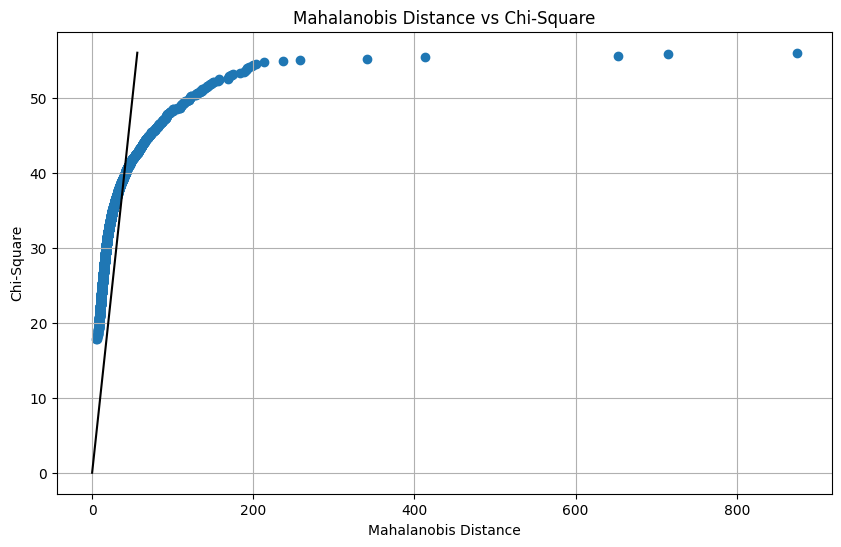

Test       Statistic  P-Value   Conclusion
0    Henze-Zirkler            1.23     0.00  Reject Null
1          Royston         4374.69     0.00  Reject Null
2      Mardia Skew 165919544009.21     0.00  Reject Null
3  Mardia Kurtosis       308842.45     0.00  Reject Null
4           Mardia             NaN      NaN  Reject Null

Cluster  1

 Accel_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.83     0.00  Reject Null
1  Kolmogorov-Smirnov       0.41     0.00  Reject Null
2         Jarque-Bera     114.76     0.00  Reject Null
3             Omnibus     120.88     0.00  Reject Null
4    Anderson-Darling      49.53     1.09  Reject Null


 Accel_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.62     0.00  Reject Null
1  Kolmogorov-Smirnov       0.41     0.00  Reject Null
2         Jarque-Bera    2311.79     0.00  Reject Null
3             Omnibus     438.43     0.00  Reject Null
4    Anderson-Darling     106.98     1.09  Reject Null


 Accel_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.46     0.00  Reject Null
1  Kolmogorov-Smirnov       0.45     0.00  Reject Null
2         Jarque-Bera    7385.71     0.00  Reject Null
3             Omnibus     620.39     0.00  Reject Null
4    Anderson-Darling     158.88     1.09  Reject Null


 Accel_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.36     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera   16460.32     0.00  Reject Null
3             Omnibus     748.33     0.00  Reject Null
4    Anderson-Darling     190.27     1.09  Reject Null


 Accel_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.30     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   33615.07     0.00  Reject Null
3             Omnibus     858.55     0.00  Reject Null
4    Anderson-Darling     214.44     1.09  Reject Null


 Accel_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.24     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   74522.11     0.00  Reject Null
3             Omnibus     997.62     0.00  Reject Null
4    Anderson-Darling     233.68     1.09  Reject Null


 Brake_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.84     0.00  Reject Null
1  Kolmogorov-Smirnov       0.32     0.00  Reject Null
2         Jarque-Bera     127.98     0.00  Reject Null
3             Omnibus     102.94     0.00  Reject Null
4    Anderson-Darling      47.97     1.09  Reject Null


 Brake_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.56     0.00  Reject Null
1  Kolmogorov-Smirnov       0.33     0.00  Reject Null
2         Jarque-Bera    4451.36     0.00  Reject Null
3             Omnibus     535.86     0.00  Reject Null
4    Anderson-Darling     121.52     1.09  Reject Null


 Brake_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.41     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera   14166.43     0.00  Reject Null
3             Omnibus     721.14     0.00  Reject Null
4    Anderson-Darling     165.43     1.09  Reject Null


 Brake_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.33     0.00  Reject Null
1  Kolmogorov-Smirnov       0.45     0.00  Reject Null
2         Jarque-Bera   25794.57     0.00  Reject Null
3             Omnibus     820.96     0.00  Reject Null
4    Anderson-Darling     197.21     1.09  Reject Null


 Brake_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.28     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera   44726.01     0.00  Reject Null
3             Omnibus     909.74     0.00  Reject Null
4    Anderson-Darling     219.73     1.09  Reject Null


 Brake_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.22     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   81312.16     0.00  Reject Null
3             Omnibus    1017.10     0.00  Reject Null
4    Anderson-Darling     239.50     1.09  Reject Null


 Car_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.97     0.00  Reject Null
1  Kolmogorov-Smirnov       0.22     0.00  Reject Null
2         Jarque-Bera      29.20     0.00  Reject Null
3             Omnibus     112.53     0.00  Reject Null
4    Anderson-Darling       6.76     1.09  Reject Null


 Credit_score


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.91     0.00  Reject Null
1  Kolmogorov-Smirnov       0.13     0.00  Reject Null
2         Jarque-Bera     112.89     0.00  Reject Null
3             Omnibus      85.67     0.00  Reject Null
4    Anderson-Darling      23.23     1.09  Reject Null


 Duration


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.65     0.00  Reject Null
1  Kolmogorov-Smirnov       0.31     0.00  Reject Null
2         Jarque-Bera     161.37     0.00  Reject Null
3             Omnibus     190.16     0.00  Reject Null
4    Anderson-Darling     136.26     1.09  Reject Null


 Insured_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.97     0.00  Reject Null
1  Kolmogorov-Smirnov       0.13     0.00  Reject Null
2         Jarque-Bera      34.62     0.00  Reject Null
3             Omnibus      94.38     0.00  Reject Null
4    Anderson-Darling       5.79     1.09  Reject Null


 Left_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.43     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera    3374.68     0.00  Reject Null
3             Omnibus     503.08     0.00  Reject Null
4    Anderson-Darling     213.24     1.09  Reject Null


 Left_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.41     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera    3935.57     0.00  Reject Null
3             Omnibus     524.47     0.00  Reject Null
4    Anderson-Darling     219.85     1.09  Reject Null


 Left_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.38     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera    5790.93     0.00  Reject Null
3             Omnibus     580.87     0.00  Reject Null
4    Anderson-Darling     227.04     1.09  Reject Null


 Left_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.36     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera    6949.04     0.00  Reject Null
3             Omnibus     609.60     0.00  Reject Null
4    Anderson-Darling     235.26     1.09  Reject Null


 Left_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.35     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera    7829.08     0.00  Reject Null
3             Omnibus     627.33     0.00  Reject Null
4    Anderson-Darling     241.08     1.09  Reject Null


 Pct_drive_2hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.37     0.00  Reject Null
1  Kolmogorov-Smirnov       0.35     0.00  Reject Null
2         Jarque-Bera  124012.86     0.00  Reject Null
3             Omnibus    1032.93     0.00  Reject Null
4    Anderson-Darling     155.56     1.09  Reject Null


 Pct_drive_3hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.11     0.00  Reject Null
1  Kolmogorov-Smirnov       0.43     0.00  Reject Null
2         Jarque-Bera 8254382.13     0.00  Reject Null
3             Omnibus    1861.03     0.00  Reject Null
4    Anderson-Darling     241.91     1.09  Reject Null


 Pct_drive_4hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.18     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera  310917.03     0.00  Reject Null
3             Omnibus    1209.39     0.00  Reject Null
4    Anderson-Darling     269.42     1.09  Reject Null


 Pct_drive_rush


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.89     0.00  Reject Null
1  Kolmogorov-Smirnov       0.08     0.00  Reject Null
2         Jarque-Bera     891.83     0.00  Reject Null
3             Omnibus     267.90     0.00  Reject Null
4    Anderson-Darling      18.08     1.09  Reject Null


 Pct_drive_wkday


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.92     0.00  Reject Null
1  Kolmogorov-Smirnov       0.13     0.00  Reject Null
2         Jarque-Bera     869.16     0.00  Reject Null
3             Omnibus     220.55     0.00  Reject Null
4    Anderson-Darling      11.38     1.09  Reject Null


 Right_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.29     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera   27448.49     0.00  Reject Null
3             Omnibus     820.96     0.00  Reject Null
4    Anderson-Darling     236.47     1.09  Reject Null


 Right_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.27     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   38952.11     0.00  Reject Null
3             Omnibus     872.49     0.00  Reject Null
4    Anderson-Darling     243.49     1.09  Reject Null


 Right_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.23     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera   76943.07     0.00  Reject Null
3             Omnibus     987.47     0.00  Reject Null
4    Anderson-Darling     250.98     1.09  Reject Null


 Right_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.21     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera   97018.66     0.00  Reject Null
3             Omnibus    1030.43     0.00  Reject Null
4    Anderson-Darling     258.43     1.09  Reject Null


 Right_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.19     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  127531.72     0.00  Reject Null
3             Omnibus    1080.57     0.00  Reject Null
4    Anderson-Darling     264.78     1.09  Reject Null


 Total_days_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.90     0.00  Reject Null
1  Kolmogorov-Smirnov       0.27     0.00  Reject Null
2         Jarque-Bera      77.56     0.00  Reject Null
3             Omnibus      90.92     0.00  Reject Null
4    Anderson-Darling      23.90     1.09  Reject Null


 Total_miles_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.68     0.00  Reject Null
1  Kolmogorov-Smirnov       0.38     0.00  Reject Null
2         Jarque-Bera    4232.54     0.00  Reject Null
3             Omnibus     499.63     0.00  Reject Null
4    Anderson-Darling      73.66     1.09  Reject Null


 Years_noclaims


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.95     0.00  Reject Null
1  Kolmogorov-Smirnov       0.19     0.00  Reject Null
2         Jarque-Bera      53.91     0.00  Reject Null
3             Omnibus      60.69     0.00  Reject Null
4    Anderson-Darling      12.83     1.09  Reject Null

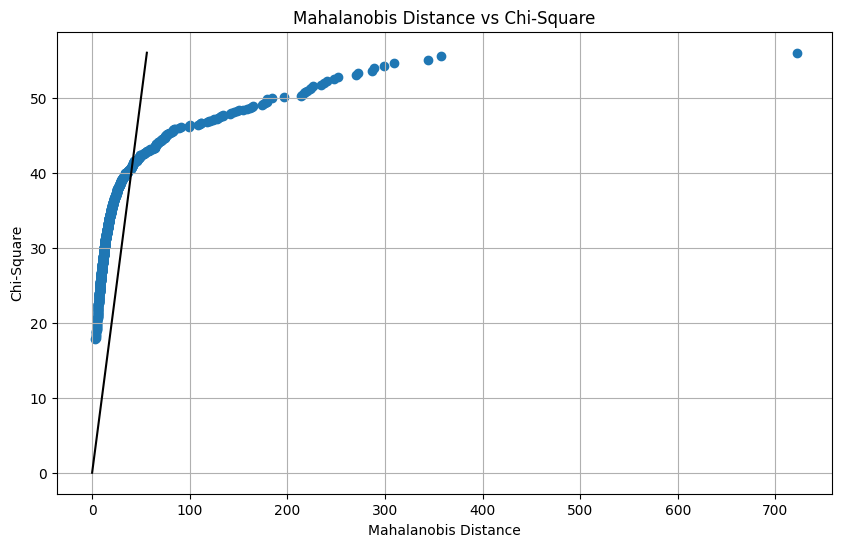

Test  Statistic  P-Value   Conclusion
0    Henze-Zirkler       2.63     0.00  Reject Null
1          Royston    2338.58     0.00  Reject Null
2      Mardia Skew  391467.71     0.00  Reject Null
3  Mardia Kurtosis     886.41     0.00  Reject Null
4           Mardia        NaN      NaN  Reject Null

Cluster  2

 Accel_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.81     0.00  Reject Null
1  Kolmogorov-Smirnov       0.30     0.00  Reject Null
2         Jarque-Bera   57544.43     0.00  Reject Null
3             Omnibus   15820.18     0.00  Reject Null
4    Anderson-Darling    2231.70     1.09  Reject Null


 Accel_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.70     0.00  Reject Null
1  Kolmogorov-Smirnov       0.44     0.00  Reject Null
2         Jarque-Bera  146306.43     0.00  Reject Null
3             Omnibus   22373.35     0.00  Reject Null
4    Anderson-Darling    4034.20     1.09  Reject Null


 Accel_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.62     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera   30788.87     0.00  Reject Null
3             Omnibus   12484.68     0.00  Reject Null
4    Anderson-Darling    7424.43     1.09  Reject Null


 Accel_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.41     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  100954.39     0.00  Reject Null
3             Omnibus   21396.22     0.00  Reject Null
4    Anderson-Darling   12815.23     1.09  Reject Null


 Accel_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.21     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera  615590.81     0.00  Reject Null
3             Omnibus   36398.70     0.00  Reject Null
4    Anderson-Darling   15684.88     1.09  Reject Null


 Accel_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.13     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera 3317905.83     0.00  Reject Null
3             Omnibus   50593.27     0.00  Reject Null
4    Anderson-Darling   16282.00     1.09  Reject Null


 Brake_06miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.86     0.00  Reject Null
1  Kolmogorov-Smirnov       0.23     0.00  Reject Null
2         Jarque-Bera   46787.56     0.00  Reject Null
3             Omnibus   14174.87     0.00  Reject Null
4    Anderson-Darling    1541.22     1.09  Reject Null


 Brake_08miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.82     0.00  Reject Null
1  Kolmogorov-Smirnov       0.32     0.00  Reject Null
2         Jarque-Bera   71397.78     0.00  Reject Null
3             Omnibus   16849.34     0.00  Reject Null
4    Anderson-Darling    1983.70     1.09  Reject Null


 Brake_09miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.78     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera   85580.46     0.00  Reject Null
3             Omnibus   18018.96     0.00  Reject Null
4    Anderson-Darling    3026.16     1.09  Reject Null


 Brake_11miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.74     0.00  Reject Null
1  Kolmogorov-Smirnov       0.46     0.00  Reject Null
2         Jarque-Bera   20080.41     0.00  Reject Null
3             Omnibus    8663.33     0.00  Reject Null
4    Anderson-Darling    4418.02     1.09  Reject Null


 Brake_12miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.40     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   56972.57     0.00  Reject Null
3             Omnibus   17964.12     0.00  Reject Null
4    Anderson-Darling   13335.53     1.09  Reject Null


 Brake_14miles


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.13     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera 3317905.83     0.00  Reject Null
3             Omnibus   50593.27     0.00  Reject Null
4    Anderson-Darling   16282.00     1.09  Reject Null


 Car_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.96     0.00  Reject Null
1  Kolmogorov-Smirnov       0.13     0.00  Reject Null
2         Jarque-Bera    2468.58     0.00  Reject Null
3             Omnibus    2272.73     0.00  Reject Null
4    Anderson-Darling     504.11     1.09  Reject Null


 Credit_score


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.88     0.00  Reject Null
1  Kolmogorov-Smirnov       0.16     0.00  Reject Null
2         Jarque-Bera   22145.36     0.00  Reject Null
3             Omnibus   10401.20     0.00  Reject Null
4    Anderson-Darling    1472.52     1.09  Reject Null


 Duration


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.60     0.00  Reject Null
1  Kolmogorov-Smirnov       0.40     0.00  Reject Null
2         Jarque-Bera    8398.60     0.00  Reject Null
3             Omnibus   22796.95     0.00  Reject Null
4    Anderson-Darling    8723.93     1.09  Reject Null


 Insured_age


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.98     0.00  Reject Null
1  Kolmogorov-Smirnov       0.07     0.00  Reject Null
2         Jarque-Bera    1314.08     0.00  Reject Null
3             Omnibus    4701.51     0.00  Reject Null
4    Anderson-Darling     171.76     1.09  Reject Null


 Left_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.68     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  101782.46     0.00  Reject Null
3             Omnibus   20283.72     0.00  Reject Null
4    Anderson-Darling    4877.90     1.09  Reject Null


 Left_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.63     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera  151339.32     0.00  Reject Null
3             Omnibus   23211.35     0.00  Reject Null
4    Anderson-Darling    5686.91     1.09  Reject Null


 Left_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.56     0.00  Reject Null
1  Kolmogorov-Smirnov       0.51     0.00  Reject Null
2         Jarque-Bera  276594.65     0.00  Reject Null
3             Omnibus   27777.93     0.00  Reject Null
4    Anderson-Darling    6946.05     1.09  Reject Null


 Left_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.51     0.00  Reject Null
1  Kolmogorov-Smirnov       0.51     0.00  Reject Null
2         Jarque-Bera  461524.40     0.00  Reject Null
3             Omnibus   31561.50     0.00  Reject Null
4    Anderson-Darling    7795.22     1.09  Reject Null


 Left_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.44     0.00  Reject Null
1  Kolmogorov-Smirnov       0.51     0.00  Reject Null
2         Jarque-Bera 1209009.69     0.00  Reject Null
3             Omnibus   38375.59     0.00  Reject Null
4    Anderson-Darling    8800.82     1.09  Reject Null


 Pct_drive_2hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.71     0.00  Reject Null
1  Kolmogorov-Smirnov       0.32     0.00  Reject Null
2         Jarque-Bera  150967.02     0.00  Reject Null
3             Omnibus   22285.09     0.00  Reject Null
4    Anderson-Darling    3670.42     1.09  Reject Null


 Pct_drive_3hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.53     0.00  Reject Null
1  Kolmogorov-Smirnov       0.42     0.00  Reject Null
2         Jarque-Bera  294094.13     0.00  Reject Null
3             Omnibus   28046.91     0.00  Reject Null
4    Anderson-Darling    7927.87     1.09  Reject Null


 Pct_drive_4hrs


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.29     0.00  Reject Null
1  Kolmogorov-Smirnov       0.46     0.00  Reject Null
2         Jarque-Bera  692513.56     0.00  Reject Null
3             Omnibus   36343.84     0.00  Reject Null
4    Anderson-Darling   13592.48     1.09  Reject Null


 Pct_drive_rush


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.10     0.00  Reject Null
2         Jarque-Bera   16998.26     0.00  Reject Null
3             Omnibus    8511.41     0.00  Reject Null
4    Anderson-Darling     805.07     1.09  Reject Null


 Pct_drive_wkday


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.93     0.00  Reject Null
1  Kolmogorov-Smirnov       0.08     0.00  Reject Null
2         Jarque-Bera   84699.78     0.00  Reject Null
3             Omnibus   11594.39     0.00  Reject Null
4    Anderson-Darling     430.02     1.09  Reject Null


 Right_turn_intensity08


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.71     0.00  Reject Null
1  Kolmogorov-Smirnov       0.47     0.00  Reject Null
2         Jarque-Bera   62518.99     0.00  Reject Null
3             Omnibus   17127.97     0.00  Reject Null
4    Anderson-Darling    4544.87     1.09  Reject Null


 Right_turn_intensity09


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.66     0.00  Reject Null
1  Kolmogorov-Smirnov       0.48     0.00  Reject Null
2         Jarque-Bera   92980.67     0.00  Reject Null
3             Omnibus   19864.21     0.00  Reject Null
4    Anderson-Darling    5333.81     1.09  Reject Null


 Right_turn_intensity10


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.59     0.00  Reject Null
1  Kolmogorov-Smirnov       0.49     0.00  Reject Null
2         Jarque-Bera  174076.67     0.00  Reject Null
3             Omnibus   24441.02     0.00  Reject Null
4    Anderson-Darling    6636.40     1.09  Reject Null


 Right_turn_intensity11


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.54     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera  255991.75     0.00  Reject Null
3             Omnibus   27391.66     0.00  Reject Null
4    Anderson-Darling    7526.01     1.09  Reject Null


 Right_turn_intensity12


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.49     0.00  Reject Null
1  Kolmogorov-Smirnov       0.50     0.00  Reject Null
2         Jarque-Bera  417304.66     0.00  Reject Null
3             Omnibus   31122.94     0.00  Reject Null
4    Anderson-Darling    8400.58     1.09  Reject Null


 Total_days_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.94     0.00  Reject Null
1  Kolmogorov-Smirnov       0.09     0.00  Reject Null
2         Jarque-Bera    2422.23     0.00  Reject Null
3             Omnibus   15111.23     0.00  Reject Null
4    Anderson-Darling     708.03     1.09  Reject Null


 Total_miles_driven


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.85     0.00  Reject Null
1  Kolmogorov-Smirnov       0.14     0.00  Reject Null
2         Jarque-Bera   62055.96     0.00  Reject Null
3             Omnibus   15567.60     0.00  Reject Null
4    Anderson-Darling    1650.14     1.09  Reject Null


 Years_noclaims


Test  Statistic  P-Value   Conclusion
0       Shapiro-Wilks       0.98     0.00  Reject Null
1  Kolmogorov-Smirnov       0.07     0.00  Reject Null
2         Jarque-Bera    1589.47     0.00  Reject Null
3             Omnibus    6710.91     0.00  Reject Null
4    Anderson-Darling     268.44     1.09  Reject Null

Data is too large for multivariate tests. Performing on a sample of 2000.


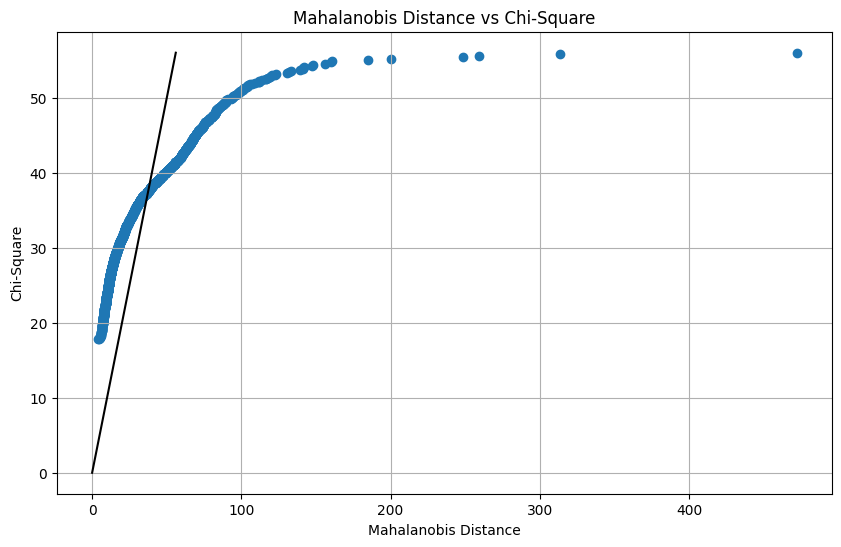

Test                                Statistic  P-Value  \
0    Henze-Zirkler                                  8000.00     0.00   
1          Royston                                  4947.77     0.00   
2      Mardia Skew -379041135105258807981044031616450560.00     1.00   
3  Mardia Kurtosis                4923618115694707605504.00     0.00   
4           Mardia                                      NaN      NaN   

            Conclusion  
0          Reject Null  
1          Reject Null  
2  Fail to Reject Null  
3          Reject Null  
4          Reject Null

In [88]:
best_model.tests_for_normality(list_of_vars=sorted(best_model.cluster_variables), 
                        gmm_scaling=True,
                        by_cluster=True, 
                        alpha=0.05, 
                        sample_size=2000)

In [18]:
df_train = best_model.df_train.copy()
df_train = best_model.scale_data(df_train)
clust_2 = df_train[best_model.clust_train_preds==2]

In [19]:
sample_index = np.random.choice(clust_2.index.values, size=2000, replace=False, p=None)
df_sample = clust_2.loc[sample_index].copy() 

In [20]:
df_sample

Pct_drive_3hrs  Pct_drive_rush  Pct_drive_2hrs  Pct_drive_4hrs  \
29955       -0.209262        2.479053        0.003281       -0.092606   
57766       -0.209262       -0.284311       -0.468831       -0.092606   
12842       -0.209262        0.206831       -0.448281       -0.092606   
30886        0.275490        1.770166       -0.135893       -0.057219   
56844        0.024236       -0.300272        0.029874       -0.092606   
...               ...             ...             ...             ...   
57254       -0.031930       -0.207356        0.182302        0.000156   
25512       -0.209262       -0.225610       -0.350403       -0.092606   
5348        -0.209262       -0.299600       -0.439180       -0.092606   
51857       -0.007605       -0.074380        0.777317       -0.092606   
39826        0.019971        0.342929       -0.239368        0.267126   

       Pct_drive_wkday  Total_miles_driven  Accel_11miles  Insured_age  \
29955        -0.475355            0.327939      -0.076774    -0.020025   
57766        -1.451804           -0.843814      -0.076774    -0.602228   
12842        -0.097124           -0.663038      -0.076774    -2.025390   
30886        -0.578650           -0.262378      -0.076774    -0.020025   
56844         0.596134            1.814222      -0.076774     0.174043   
...                ...                 ...            ...          ...   
57254        -0.057698            0.247581      -0.076774     0.950314   
25512        -0.870168            1.606583       0.003793    -0.860984   
5348         -0.881159            0.356769      -0.076774     0.626868   
51857         1.068882            0.617763      -0.076774     0.109354   
39826        -0.136972           -0.128626      -0.076774     0.174043   

       Total_days_driven  Left_turn_intensity11  ...   Car_age  \
29955          -0.006200              -0.035423  ... -0.159380   
57766          -1.331462              -0.036109  ... -1.141618   
12842          -0.481466              -0.036109  ... -1.632737   
30886          -0.042759              -0.035080  ... -0.159380   
56844           0.267992              -0.036040  ... -0.159380   
...                  ...                    ...  ...       ...   
57254          -0.006200              -0.036109  ...  0.577298   
25512           1.657233              -0.033571  ...  0.822858   
5348            0.249713              -0.036109  ...  0.086179   
51857           0.204014              -0.034600  ... -0.159380   
39826          -0.591143              -0.036109  ... -0.650499   

       Years_noclaims  Credit_score  Left_turn_intensity12  \
29955        0.388156      0.315150              -0.034253   
57766       -0.232660     -1.156046              -0.034394   
12842       -1.598457      0.279268              -0.034394   
30886        0.326075      1.188300              -0.034253   
56844        0.388156      0.602213              -0.034394   
...               ...           ...                    ...   
57254        1.257300      0.793588              -0.034394   
25512       -1.039722      0.016127              -0.033619   
5348         0.822728     -0.091522              -0.034394   
51857        0.263993      0.494565              -0.033901   
39826        0.450238      1.176339              -0.034394   

       Right_turn_intensity12  Accel_12miles  Right_turn_intensity09  \
29955               -0.022801      -0.054121               -0.044788   
57766               -0.023367      -0.054121               -0.049216   
12842               -0.023141      -0.054121               -0.049122   
30886               -0.019967      -0.054121               -0.006720   
56844               -0.023367      -0.054121               -0.051855   
...                       ...            ...                     ...   
57254               -0.023367      -0.054121               -0.045730   
25512               -0.022461      -0.054121               -0.023586   
5348                -0.023367      -0.054121           

In [21]:
best_model.mardia_test(df=clust_2[best_model.continuous_variables + best_model.discrete_variables], scale=False)

(-1.6092893000851689e+35, 1.0, 1.6666160573626576e+21, 0.0)

In [25]:
165919544009.21

165919544009.21

In [23]:
print(best_model.use_pca)
if best_model.use_pca:
    print(best_model.p)
    print(best_model.pca_vars)
    print(best_model.pca_variables)

False


In [24]:
if best_model.use_pca:
    print((best_model.predict_pca(df=best_model.df_train, scaling=True, return_df=True) == best_model.df_train).all().all())
    print((best_model.predict_pca(df=best_model.df_valid, scaling=True, return_df=True) == best_model.df_valid).all().all())
    print((best_model.predict_pca(df=best_model.df_test, scaling=True, return_df=True) == best_model.df_test).all().all())

In [25]:
if best_model.use_pca:
    print(best_model.loading_matrix)

In [26]:
if best_model.use_pca:
    best_model.get_pca_summary(verbose=True, savefig=False, figloc=None)

In [27]:
print(best_model.n_components)
print(best_model.covariance_type)
print(best_model.cluster_variables)
print(best_model.gmm_scaling)

3
full
['Pct_drive_3hrs', 'Pct_drive_rush', 'Pct_drive_2hrs', 'Pct_drive_4hrs', 'Pct_drive_wkday', 'Total_miles_driven', 'Accel_11miles', 'Insured_age', 'Total_days_driven', 'Left_turn_intensity11', 'Left_turn_intensity08', 'Right_turn_intensity08', 'Accel_08miles', 'Brake_06miles', 'Left_turn_intensity10', 'Accel_09miles', 'Duration', 'Brake_12miles', 'Brake_14miles', 'Brake_08miles', 'Right_turn_intensity10', 'Brake_09miles', 'Left_turn_intensity09', 'Accel_14miles', 'Car_age', 'Years_noclaims', 'Credit_score', 'Left_turn_intensity12', 'Right_turn_intensity12', 'Accel_12miles', 'Right_turn_intensity09', 'Right_turn_intensity11', 'Brake_11miles', 'Accel_06miles']
True


In [28]:
train_gmm_prob, train_gmm_pred = best_model.predict_gmm(df=best_model.df_train, prob=False, return_both=True, gmm_scaling=True)
if best_model.valid_set:
    valid_gmm_prob, valid_gmm_pred = best_model.predict_gmm(df=best_model.df_valid, prob=False, return_both=True, gmm_scaling=True)
if best_model.test_set:
    test_gmm_prob, test_gmm_pred = best_model.predict_gmm(df=best_model.df_test, prob=False, return_both=True, gmm_scaling=True)
print((train_gmm_pred == best_model.clust_train_preds).all())
print((train_gmm_prob == best_model.clust_train_proba).all())
if best_model.valid_set:
    print((valid_gmm_pred == best_model.clust_valid_preds).all())
    print((valid_gmm_prob == best_model.clust_valid_proba).all())
if best_model.test_set:
    print((test_gmm_pred == best_model.clust_test_preds).all())
    print((test_gmm_prob == best_model.clust_test_proba).all())

True
True
True
True
True
True


In [29]:
print(best_model.gmm_information_criteria(df=None, which="bic", gmm_scaling=True))
print(best_model.gmm_information_criteria(df=None, which="aic", gmm_scaling=True))

(-5842067.995393717, -1932807.9018151425, -1914973.1384503092)
(-5859072.961993751, -1947737.5898018833, -1929902.82643705)


In [30]:
best_model.get_gmm_summary(verbose=True, gmm_scaling=True, return_results=True)


Training set BIC:
-5842067.995393717

Validation set BIC:
-1932807.9018151425

Test set BIC:
-1914973.1384503092


(-5842067.995393717, -1932807.9018151425, -1914973.1384503092)

In [138]:
sum(best_model.df_train["Claim"]==1)/60000

0.04195

In [ ]:
# Slow
#best_model.get_gmm_variable_plots(verbose=True, savefig=False, figloc=None)


Training set


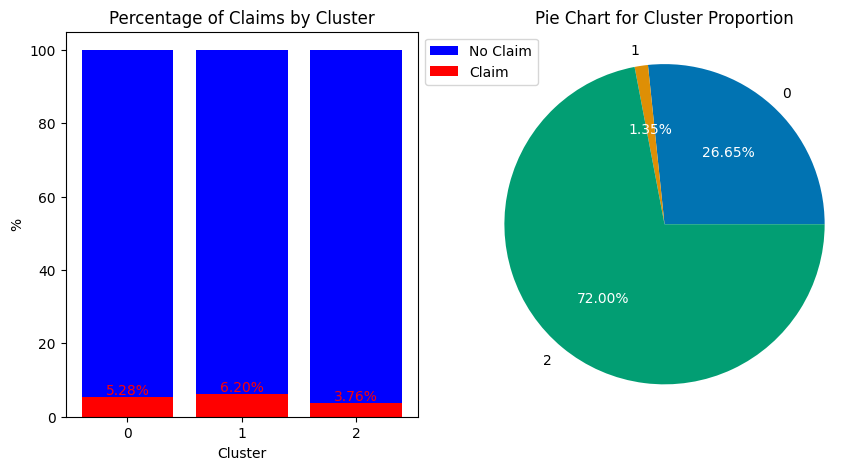


Validation set


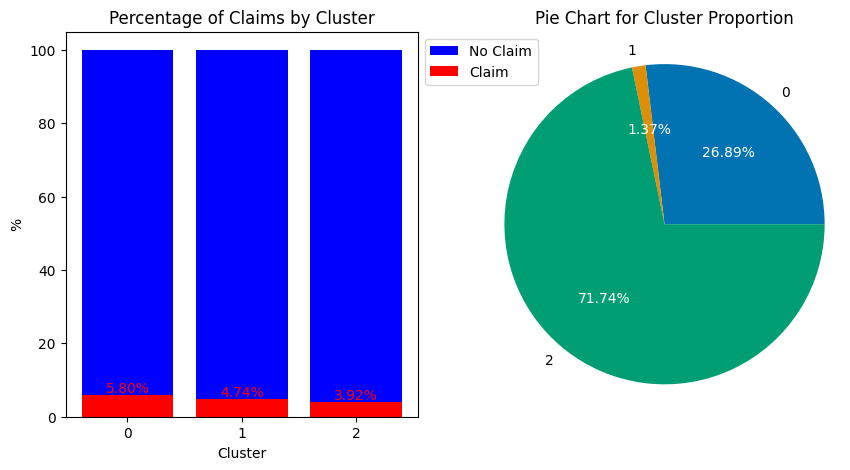


Test set


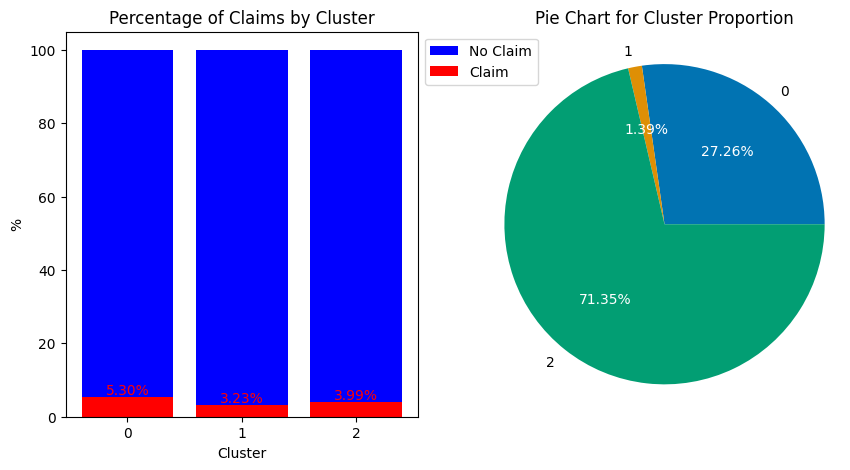

In [132]:
best_model.get_gmm_claims_plots(verbose=True, savefig=True, figloc="../regression_files/regression_figures/best_model_figs/")

In [32]:
print(best_model.glm_family)
print(best_model.problem_type)
print(best_model.glm_scaling)

classification
True


In [33]:
if best_model.problem_type=="classification":
    print(best_model.clust0_glm_cutoff)
    print(best_model.clust1_glm_cutoff)
    print(best_model.clust2_glm_cutoff)

0.04356198266809681
0.07250366839456332
0.03685386930994062


In [34]:
print(best_model.stepwise_regression_variables, "\n")
print(best_model.clust0_glm_vars, "\n")
if best_model.n_components>1:
    print(best_model.clust1_glm_vars, "\n")
    print(best_model.clust2_glm_vars)

{0: ['Total_miles_driven', 'I(Years_noclaims ** 3)', 'I(Total_days_driven ** 3)', 'I(Brake_09miles ** 2)', 'I(Brake_11miles ** 3)'], 1: ['Total_miles_driven', 'Duration', 'Insured_age', 'I(Duration ** 3)', 'I(Left_turn_intensity09 ** 3)'], 2: ['I(Total_days_driven ** 3)', 'Total_miles_driven', 'Credit_score', 'I(Brake_12miles ** 3)', 'I(Car_age ** 3)', 'I(Duration ** 3)', 'Right_turn_intensity08', 'I(Pct_drive_rush ** 3)', 'Right_turn_intensity11', 'I(Accel_06miles ** 3)', 'I(Pct_drive_wkday ** 3)']} 

['Total_miles_driven', 'I(Years_noclaims ** 3)', 'I(Total_days_driven ** 3)', 'I(Brake_09miles ** 2)', 'I(Brake_11miles ** 3)'] 

['Total_miles_driven', 'Duration', 'Insured_age', 'I(Duration ** 3)', 'I(Left_turn_intensity09 ** 3)'] 

['I(Total_days_driven ** 3)', 'Total_miles_driven', 'Credit_score', 'I(Brake_12miles ** 3)', 'I(Car_age ** 3)', 'I(Duration ** 3)', 'Right_turn_intensity08', 'I(Pct_drive_rush ** 3)', 'Right_turn_intensity11', 'I(Accel_06miles ** 3)', 'I(Pct_drive_wkday ** 

In [35]:
print(best_model.glm_information_criterion(glm=best_model.clust0_glm, which="bic_llf"))
print(best_model.glm_information_criterion(glm=best_model.clust0_glm, which="bic_deviance"))
print(best_model.glm_information_criterion(glm=best_model.clust0_glm, which="aic"), "\n")
if best_model.n_components>1:
    print(best_model.glm_information_criterion(glm=best_model.clust1_glm, which="bic_llf"))
    print(best_model.glm_information_criterion(glm=best_model.clust1_glm, which="bic_deviance"))
    print(best_model.glm_information_criterion(glm=best_model.clust1_glm, which="aic"), "\n")

    print(best_model.glm_information_criterion(glm=best_model.clust2_glm, which="bic_llf"))
    print(best_model.glm_information_criterion(glm=best_model.clust2_glm, which="bic_deviance"))
    print(best_model.glm_information_criterion(glm=best_model.clust2_glm, which="aic"), "\n")

5873.686356630676
-148905.01734855902
5827.608043795708 

328.85707041317767
-5072.655129880671
300.697128403558 

12578.800423118591
-448555.5579151995
12474.716440523405 



In [7]:
dict_results = best_model.predict_glm(df=best_model.df_train, 
                               which="mean", 
                               return_all=True, 
                               glm_scaling=True, 
                               weighted=False)
if (best_model.glm_exposure is not None) and (best_model.glm_offset is not None): 
    if best_model.problem_type=="classification":
        train_mean, train_linear, train_class, train_exposure_offset_adjusted, train_exposure_adjusted, train_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
    else:
        train_mean, train_linear, train_exposure_offset_adjusted, train_exposure_adjusted, train_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
elif best_model.glm_exposure is not None:
    if best_model.problem_type=="classification":
        train_mean, train_linear, train_class, train_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_adjusted']
    else:
        train_mean, train_linear, train_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_adjusted']
elif best_model.glm_offset is not None:
    if best_model.problem_type=="classification":
        train_mean, train_linear, train_class, train_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['offset_adjusted']
    else:
        train_mean, train_linear, train_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['offset_adjusted']
else:
    if best_model.problem_type=="classification":
        train_mean, train_linear, train_class = dict_results['mean'], dict_results['linear'], dict_results['class']
    else:
        train_mean, train_linear = dict_results['mean'], dict_results['linear']
if best_model.valid_set:
    dict_results = best_model.predict_glm(df=best_model.df_valid, 
                                   which="mean", 
                                   return_all=True, 
                                   glm_scaling=True, 
                                   weighted=False)
    if (best_model.glm_exposure is not None) and (best_model.glm_offset is not None): 
        if best_model.problem_type=="classification":
            valid_mean, valid_linear, valid_class, valid_exposure_offset_adjusted, valid_exposure_adjusted, valid_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
        else:
            valid_mean, valid_linear, valid_exposure_offset_adjusted, valid_exposure_adjusted, valid_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
    elif best_model.glm_exposure is not None:
        if best_model.problem_type=="classification":
            valid_mean, valid_linear, valid_class, valid_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_adjusted']
        else:
            valid_mean, valid_linear, valid_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_adjusted']
    elif best_model.glm_offset is not None:
        if best_model.problem_type=="classification":
            valid_mean, valid_linear, valid_class, valid_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['offset_adjusted']
        else:
            valid_mean, valid_linear, valid_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['offset_adjusted']
    else:
        if best_model.problem_type=="classification":
            valid_mean, valid_linear, valid_class = dict_results['mean'], dict_results['linear'], dict_results['class']
        else:
            valid_mean, valid_linear = dict_results['mean'], dict_results['linear']
if best_model.test_set:
    dict_results = best_model.predict_glm(df=best_model.df_test, 
                                   which="mean", 
                                   return_all=True, 
                                   glm_scaling=True, 
                                   weighted=False)
    if (best_model.glm_exposure is not None) and (best_model.glm_offset is not None): 
        if best_model.problem_type=="classification":
            test_mean, test_linear, test_class, test_exposure_offset_adjusted, test_exposure_adjusted, test_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
        else:
            test_mean, test_linear, test_exposure_offset_adjusted, test_exposure_adjusted, test_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_offset_adjusted'], dict_results['exposure_adjusted'], dict_results['offset_adjusted']
    elif best_model.glm_exposure is not None:
        if best_model.problem_type=="classification":
            test_mean, test_linear, test_class, test_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['exposure_adjusted']
        else:
            test_mean, test_linear, test_exposure_adjusted = dict_results['mean'], dict_results['linear'], dict_results['exposure_adjusted']
    elif best_model.glm_offset is not None:
        if best_model.problem_type=="classification":
            test_mean, test_linear, test_class, test_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['class'], dict_results['offset_adjusted']
        else:
            test_mean, test_linear, test_offset_adjusted = dict_results['mean'], dict_results['linear'], dict_results['offset_adjusted']
    else:
        if best_model.problem_type=="classification":
            test_mean, test_linear, test_class = dict_results['mean'], dict_results['linear'], dict_results['class']
        else:
            test_mean, test_linear = dict_results['mean'], dict_results['linear']

In [40]:
regression_metric_list = ['r2_score', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'mean_absolute_percentage_error', 'median_absolute_error', 'max_error', 'explained_variance_score', 'mean_tweedie_deviance', 'mean_pinball_loss', 'root_mean_squared_error', 'root_mean_squared_log_error', 'mean_poisson_deviance', 'd2_absolute_error_score']
classification_metric_list_pred=['mavg',  'accuracy_score', 'balanced_accuracy_score', 'f1_score', 'precision_score', 'recall_score', 'jaccard_score']
classification_metric_list_proba=['top_k_accuracy_score', 'average_precision_score', 'brier_score_loss', 'log_loss', 'roc_auc_score'] # They require probabilities, not 0 or 1
if best_model.problem_type=="regression":
    for metric in regression_metric_list:    
        print("\n",metric,":")
        print(best_model.glm_metric(y_true=best_model.df_train["Claim"], y_pred=train_mean, metric=metric, problem_type="regression"))
        if best_model.valid_set:
            print(best_model.glm_metric(y_true=best_model.df_valid["Claim"], y_pred=valid_mean, metric=metric, problem_type="regression"))
        if best_model.test_set:
            print(best_model.glm_metric(y_true=best_model.df_test["Claim"], y_pred=test_mean, metric=metric, problem_type="regression"))
else:
    for metric in classification_metric_list_pred:     
        print("\n",metric,":")
        print(best_model.glm_metric(y_true=best_model.df_train["Claim"], y_pred=train_class, metric=metric, problem_type="classification"))
        if best_model.valid_set:
            print(best_model.glm_metric(y_true=best_model.df_valid["Claim"], y_pred=valid_class, metric=metric, problem_type="classification"))
        if best_model.test_set:
            print(best_model.glm_metric(y_true=best_model.df_test["Claim"], y_pred=test_class, metric=metric, problem_type="classification"))
    for metric in classification_metric_list_proba:     
        print("\n",metric,":")
        print(best_model.glm_metric(y_true=best_model.df_train["Claim"], y_pred=train_mean, metric=metric, problem_type="classification"))
        if best_model.valid_set:
            print(best_model.glm_metric(y_true=best_model.df_valid["Claim"], y_pred=valid_mean, metric=metric, problem_type="classification"))
        if best_model.test_set:
            print(best_model.glm_metric(y_true=best_model.df_test["Claim"], y_pred=test_mean, metric=metric, problem_type="classification"))


 mavg :
0.7180856823424635
0.7501145365236783
0.7190986835101638

 accuracy_score :
0.6920666666666667
0.69915
0.6885

 balanced_accuracy_score :
0.7186727559624458
0.7523863597796205
0.7199212144021172

 f1_score :
0.16924460431654675
0.19310714764650663
0.17352082780578404

 precision_score :
0.09542158900775743
0.10960572385446796
0.09803627642032679

 recall_score :
0.7477155343663091
0.8108108108108109
0.754325259515571

 jaccard_score :
0.09244523037626486
0.10687249517589431
0.09500290528762348

 top_k_accuracy_score :
0.9579666666666666
0.9556
0.95675

 average_precision_score :
0.1222403098496245
0.13862484046630508
0.13020082968879945

 brier_score_loss :
0.03855767351459053
0.040301261449108026
0.03959104174230807

 log_loss :
0.15462518010602228
0.15857262427613575
0.15805524374413876

 roc_auc_score :
0.7754305152532669
0.7918279963722618
0.7741182330135962


In [41]:
print((best_model.glm_train_pred_mean == train_mean).all())
print((best_model.glm_train_pred_linear == train_linear).all())
if best_model.problem_type=="classification":
    print((best_model.glm_train_pred_class == train_class).all())
if (best_model.glm_exposure is not None) and (best_model.glm_offset is not None): 
    print((best_model.glm_train_pred_mean_exposure_offset_adjusted == train_exposure_offset_adjusted).all())
if best_model.glm_exposure is not None:
    print((best_model.glm_train_pred_mean_exposure_adjusted == train_exposure_adjusted).all())
if best_model.glm_offset is not None:
    print((best_model.glm_train_pred_mean_offset_adjusted == train_offset_adjusted).all())
if best_model.valid_set:
    print((best_model.glm_valid_pred_mean == valid_mean).all())
    print((best_model.glm_valid_pred_linear == valid_linear).all())
    if best_model.problem_type=="classification":
        print((best_model.glm_valid_pred_class == valid_class).all())
    if (best_model.glm_exposure is not None) and (mod.glm_offset is not None): 
        print((best_model.glm_valid_pred_mean_exposure_offset_adjusted == valid_exposure_offset_adjusted).all())
    if best_model.glm_exposure is not None:
        print((best_model.glm_valid_pred_mean_exposure_adjusted == valid_exposure_adjusted).all())
    if best_model.glm_offset is not None:
        print((best_model.glm_valid_pred_mean_offset_adjusted == valid_offset_adjusted).all())
if best_model.test_set:
    print((best_model.glm_test_pred_mean == test_mean).all())
    print((best_model.glm_test_pred_linear == test_linear).all())
    if best_model.problem_type=="classification":
        print((best_model.glm_test_pred_class == test_class).all())
    if (best_model.glm_exposure is not None) and (mod.glm_offset is not None): 
        print((best_model.glm_test_pred_mean_exposure_offset_adjusted == test_exposure_offset_adjusted).all())
    if best_model.glm_exposure is not None:
        print((best_model.glm_test_pred_mean_exposure_adjusted == test_exposure_adjusted).all())
    if best_model.glm_offset is not None:
        print((best_model.glm_test_pred_mean_offset_adjusted == test_offset_adjusted).all())

True
True
True
True
True
True
True
True
True


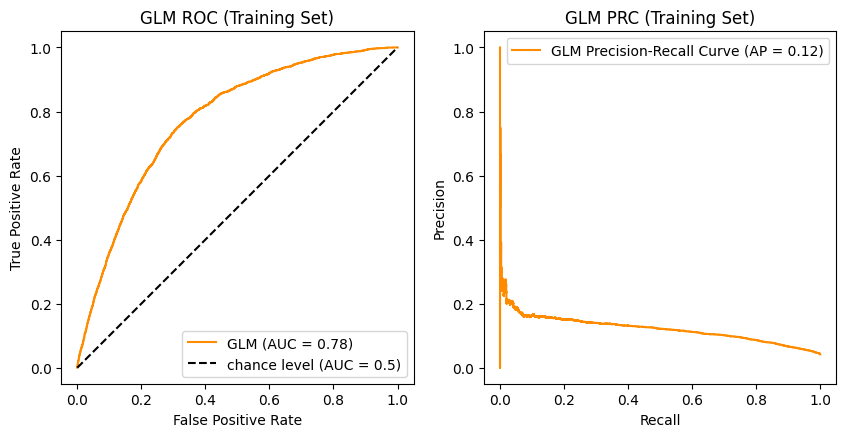

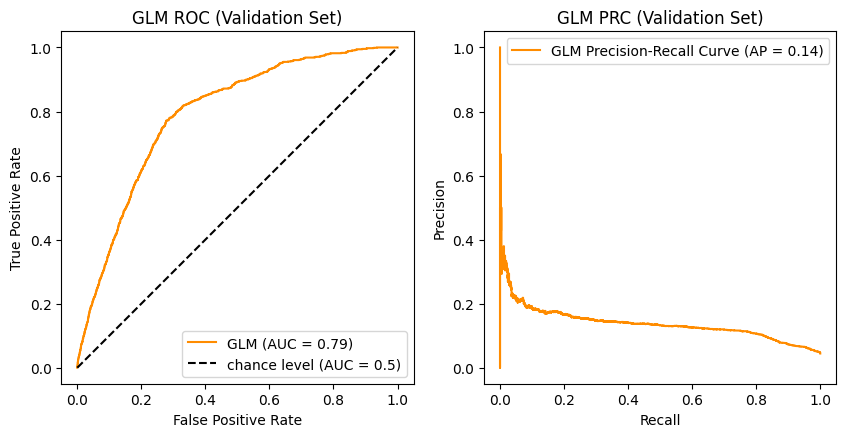

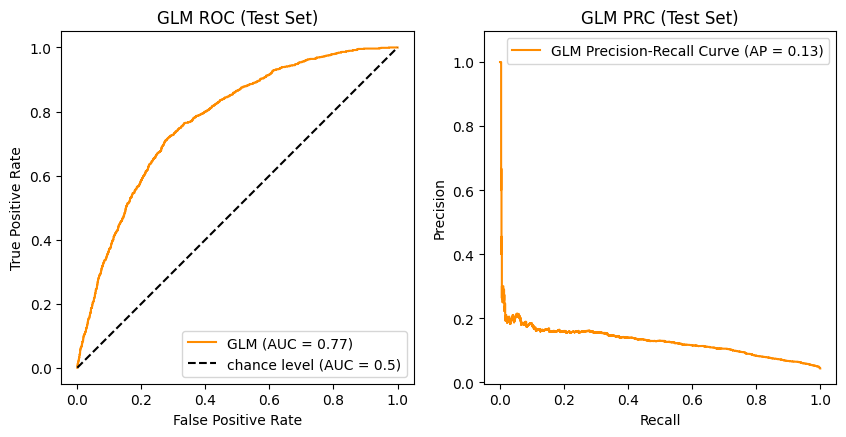

In [42]:
best_model.get_glm_curve_plots(verbose=True,
                        savefig=False,
                        figloc=None,
                        kwargs_for_roc={},
                        kwargs_for_pr={})


Training Set


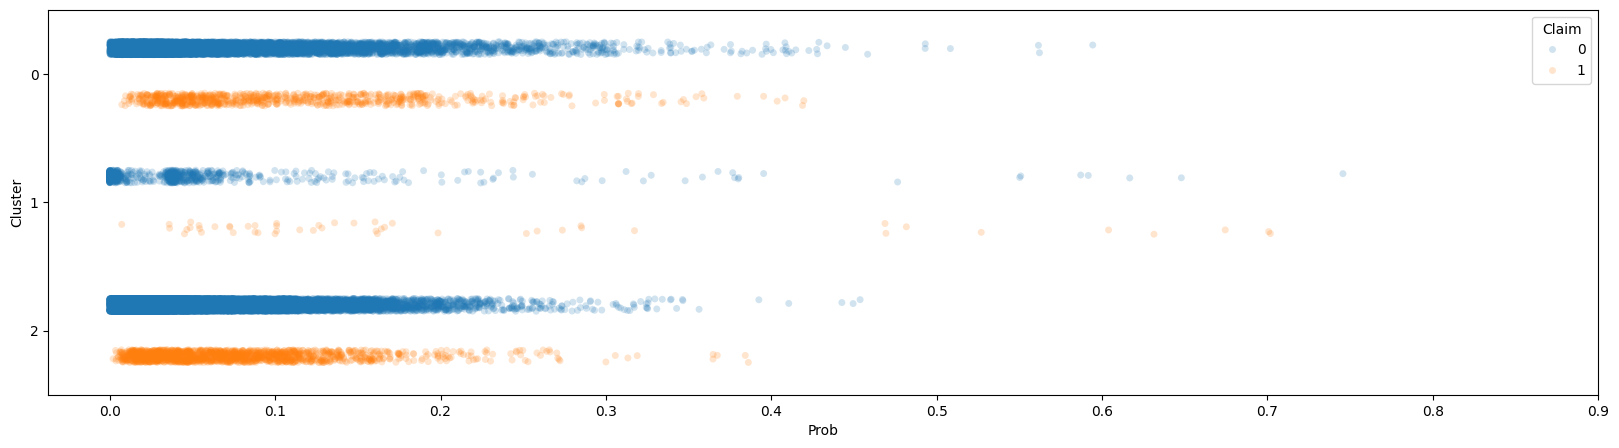

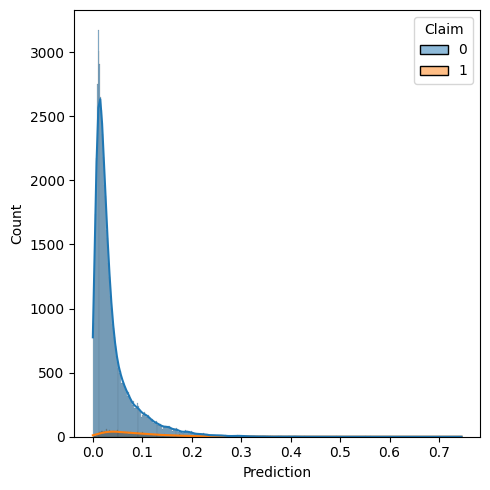

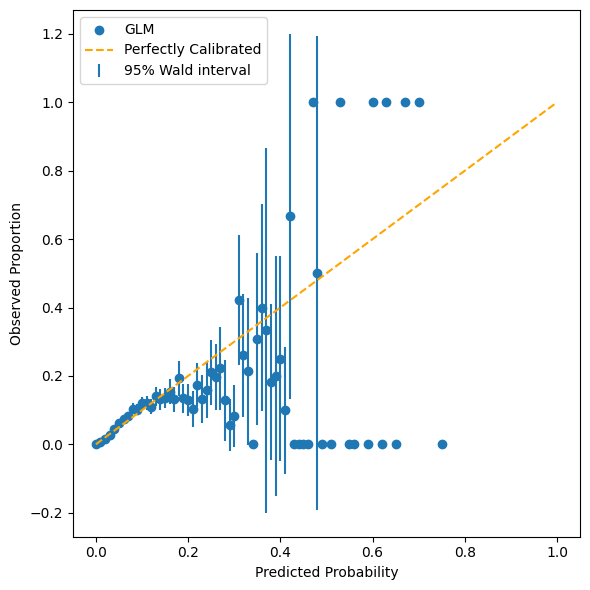


Validation Set


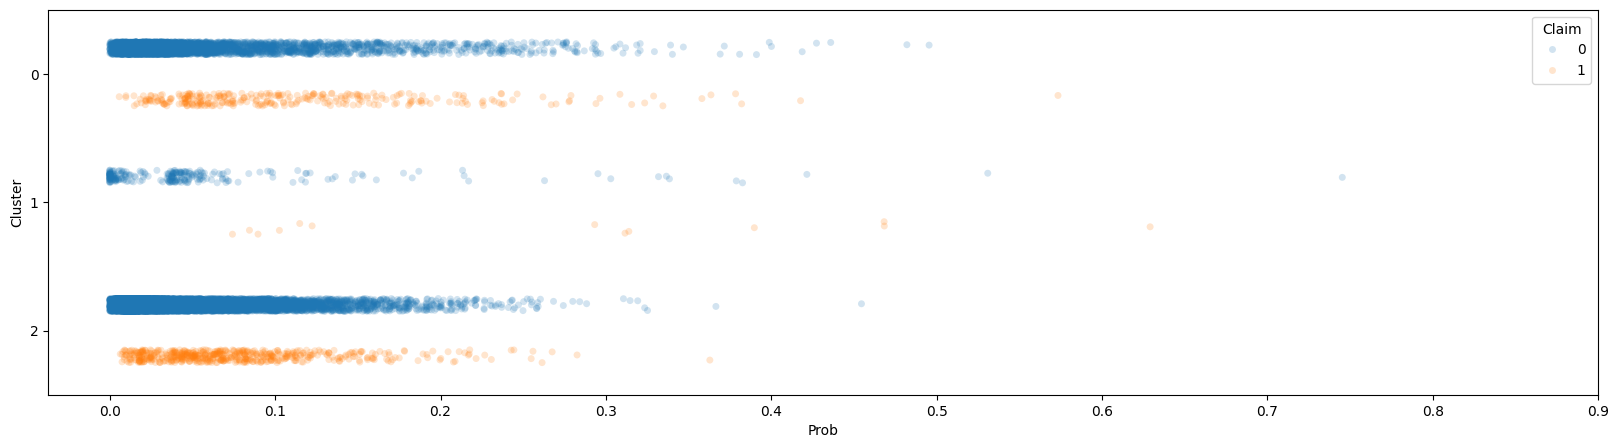

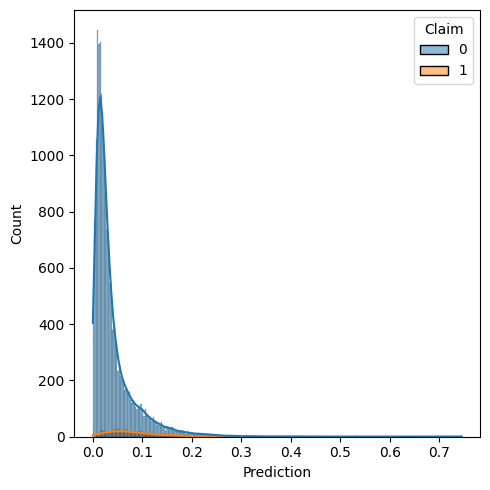

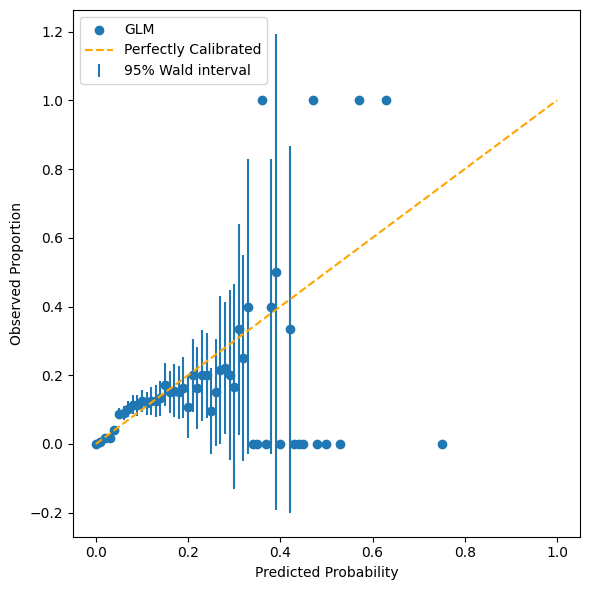


Test Set


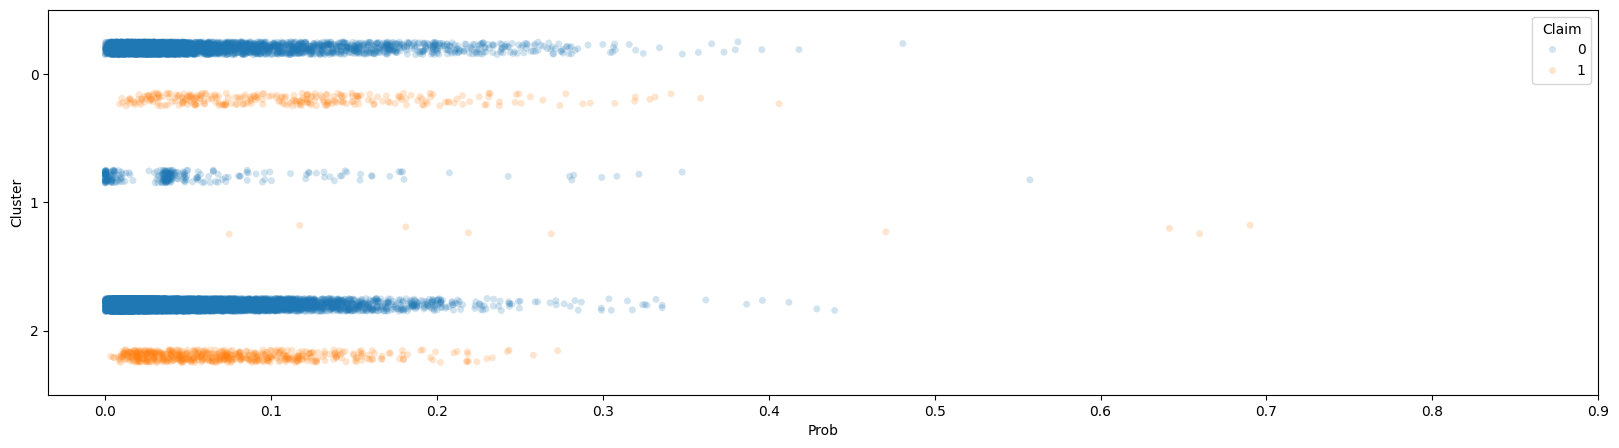

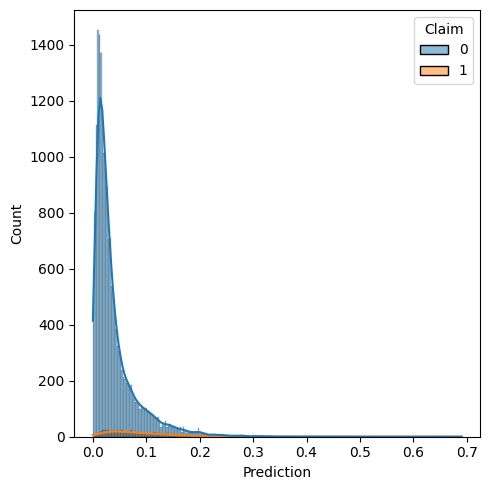

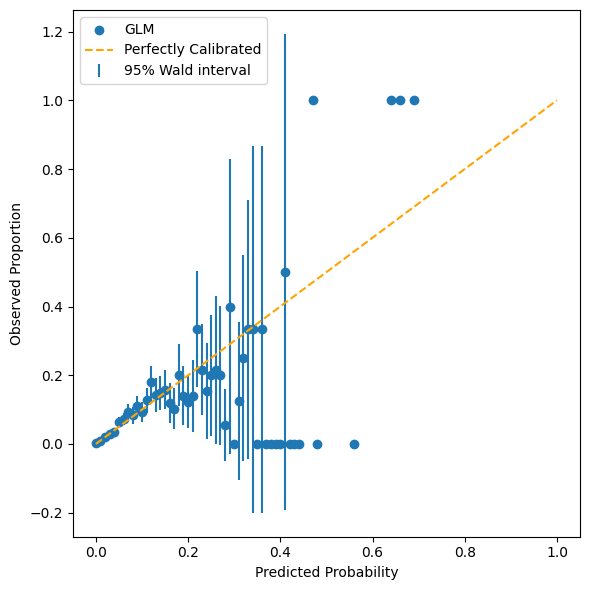

In [28]:
best_model.get_glm_histogram_plots(verbose=True,
                            savefig=True,
                            figloc="../regression_files/regression_figures/best_model_figs/")


GLM Partial Dependency Plots for cluster 0.


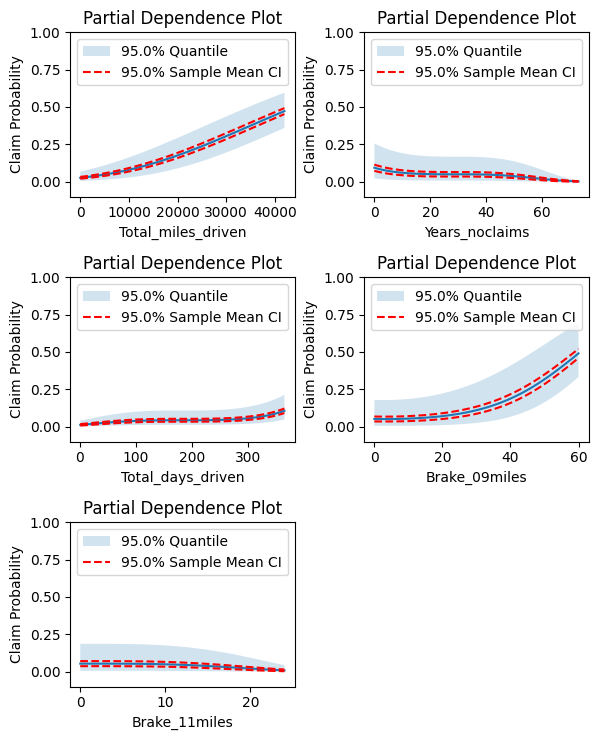


GLM Partial Dependency Plots for cluster 1.


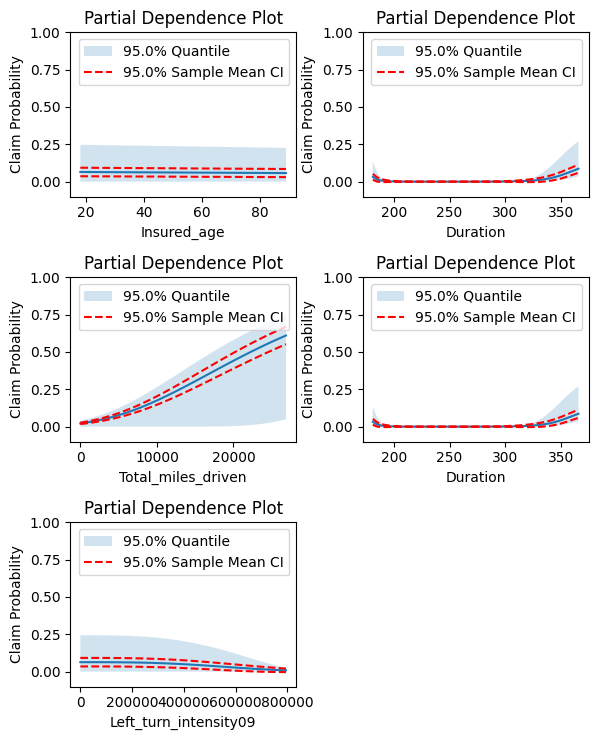


GLM Partial Dependency Plots for cluster 2.


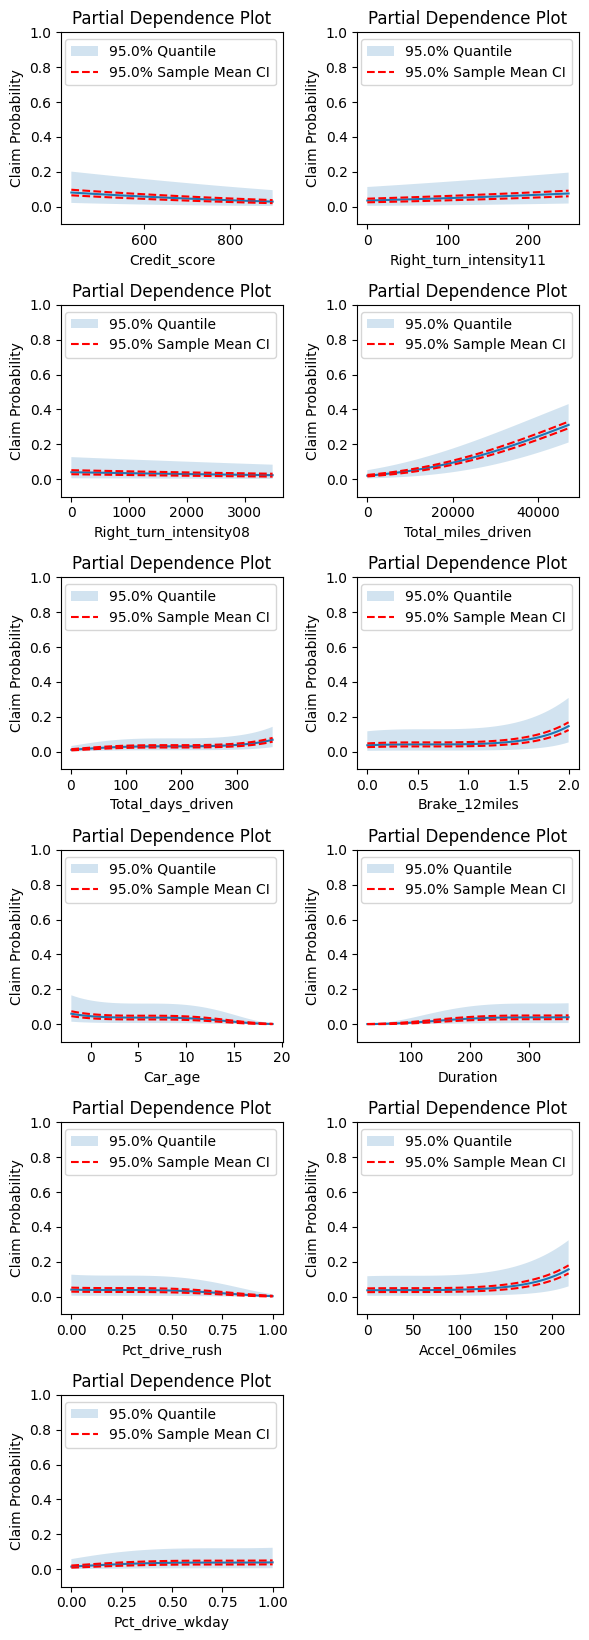

In [44]:
best_model.get_glm_partial_dependency_plots(verbose=True, savefig=False, figloc=None)


GLM Diagnostics for cluster 0.


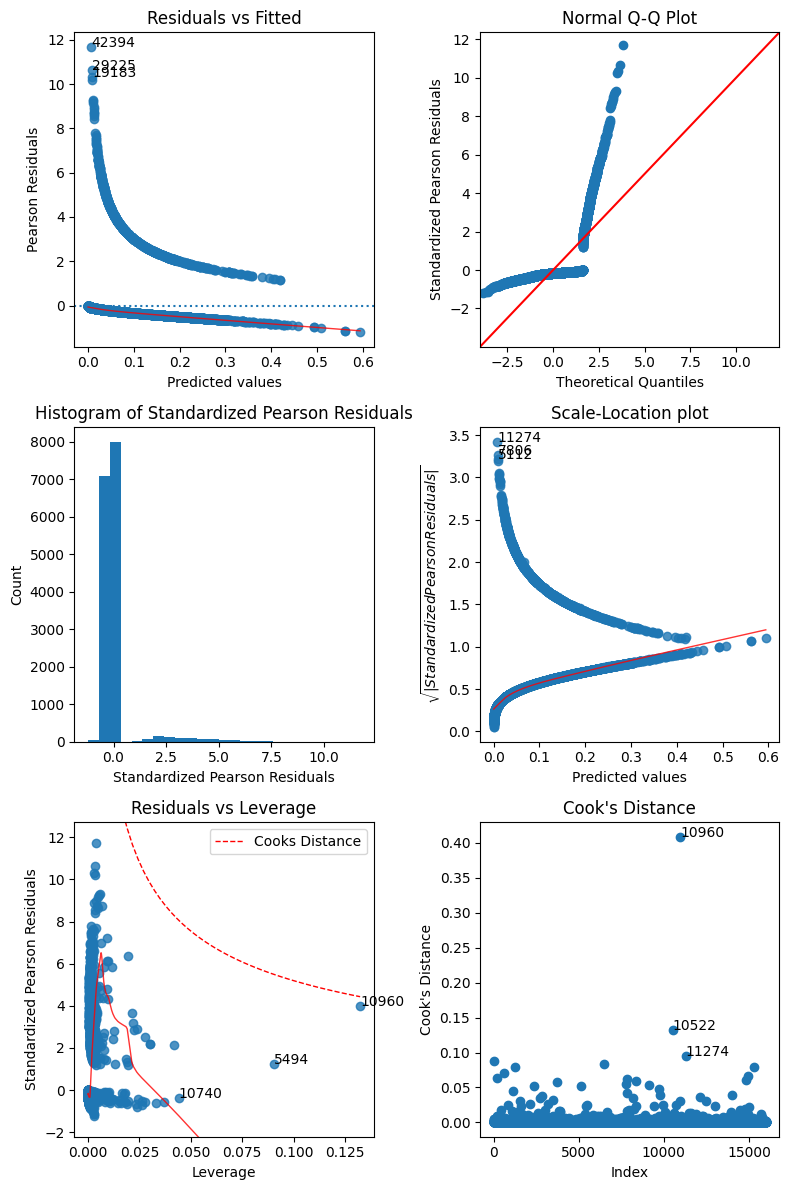


GLM Diagnostics for cluster 1.


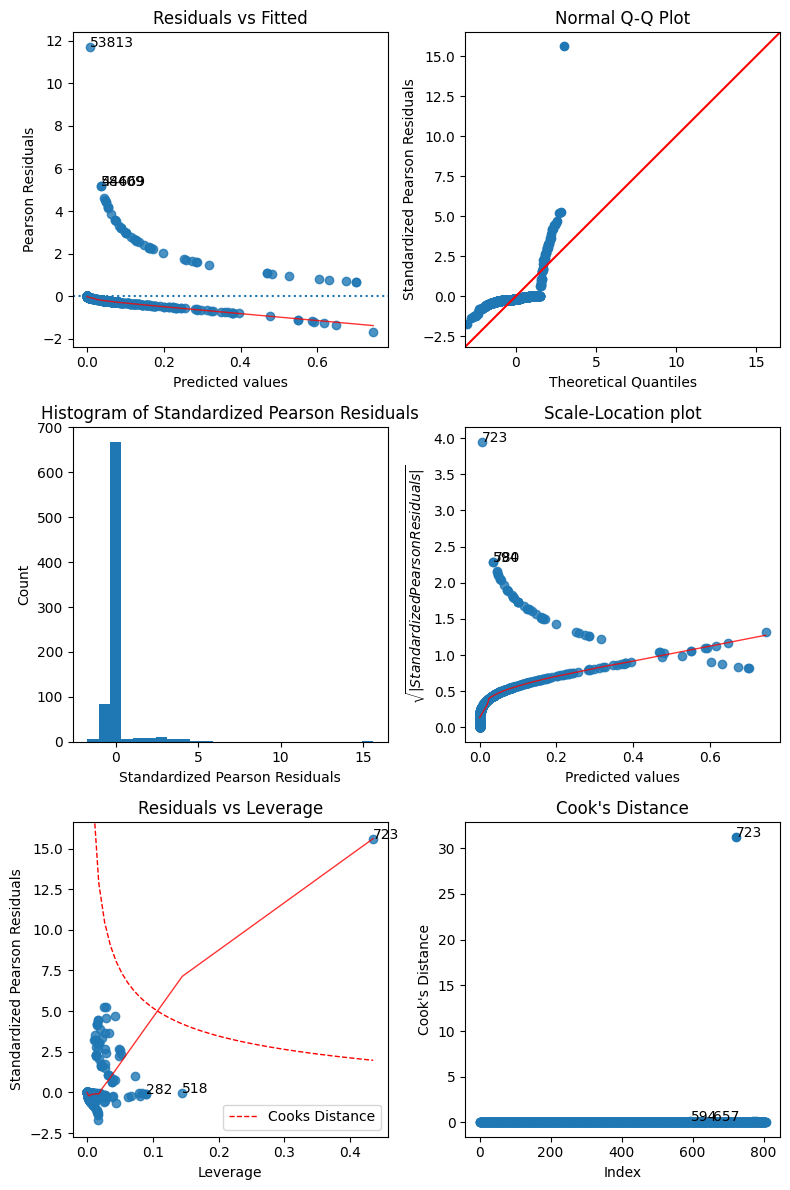


GLM Diagnostics for cluster 2.


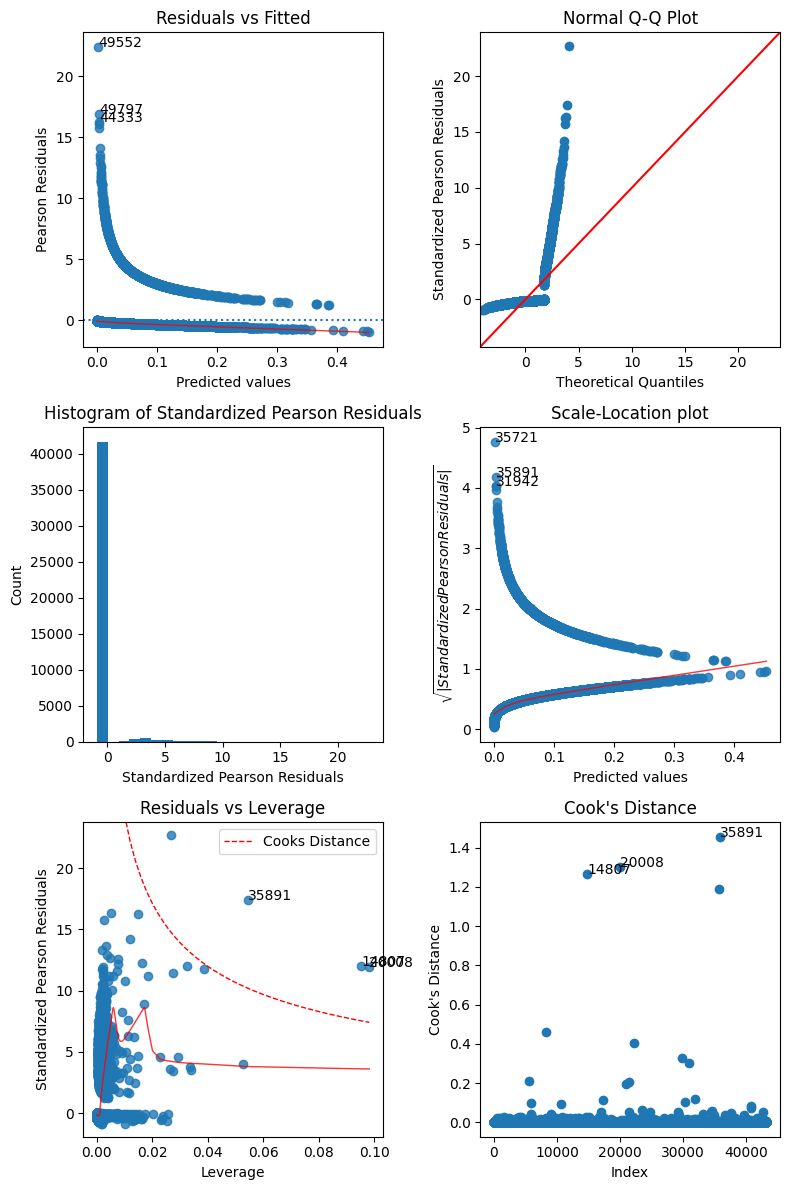

In [49]:
# very slow
best_model.get_glm_diagnostic_plots(verbose=True,savefig=False,figloc=None,res_type='Pearson')


GLM Diagnostics for cluster 0.


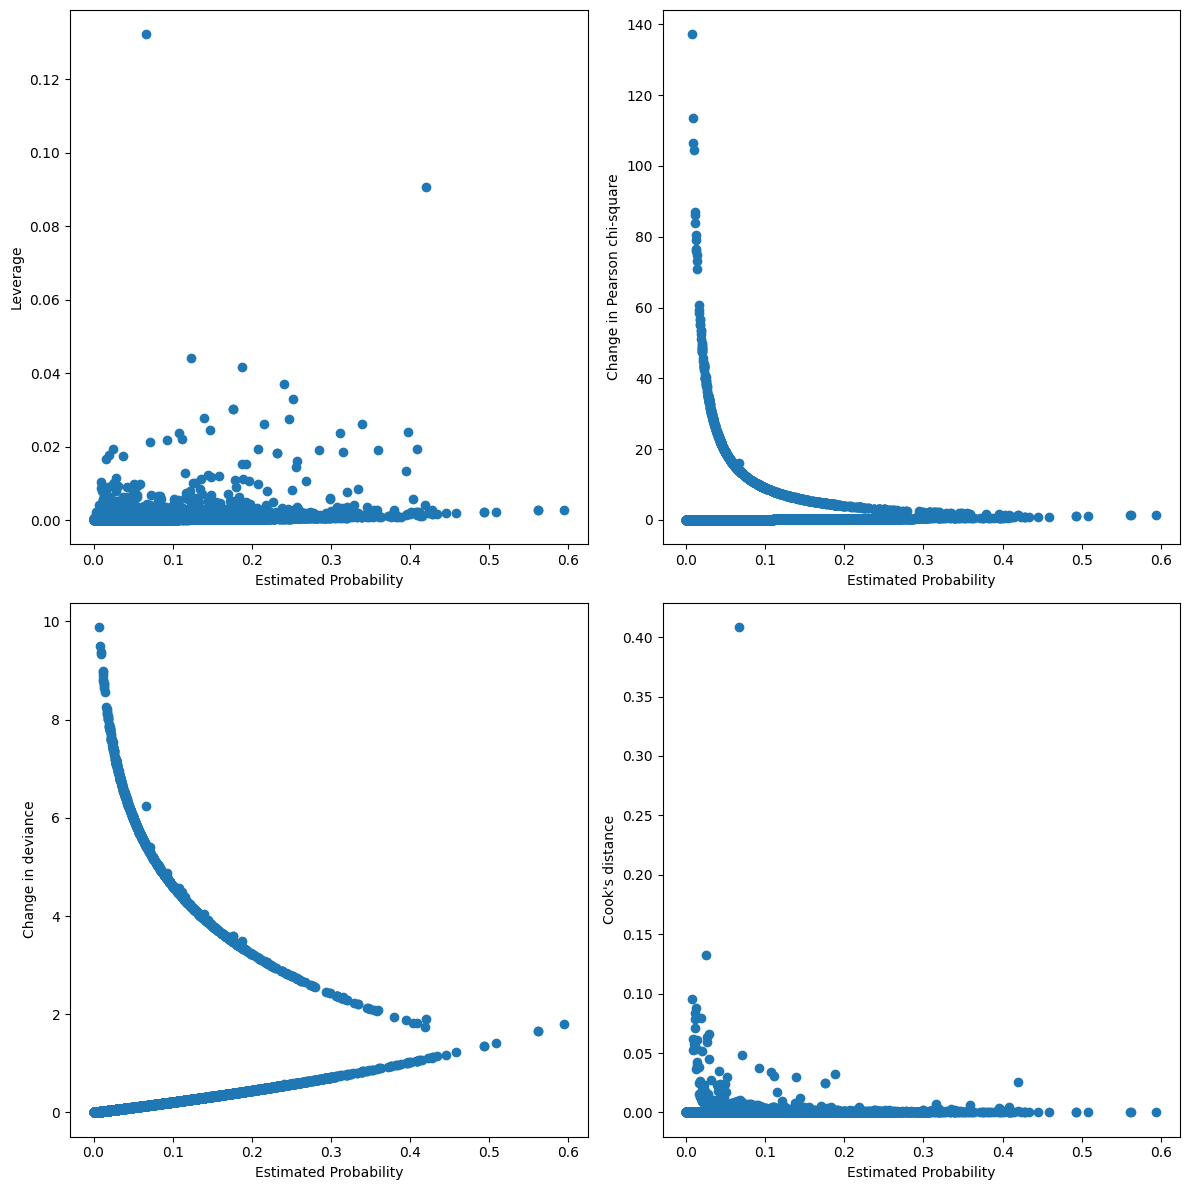

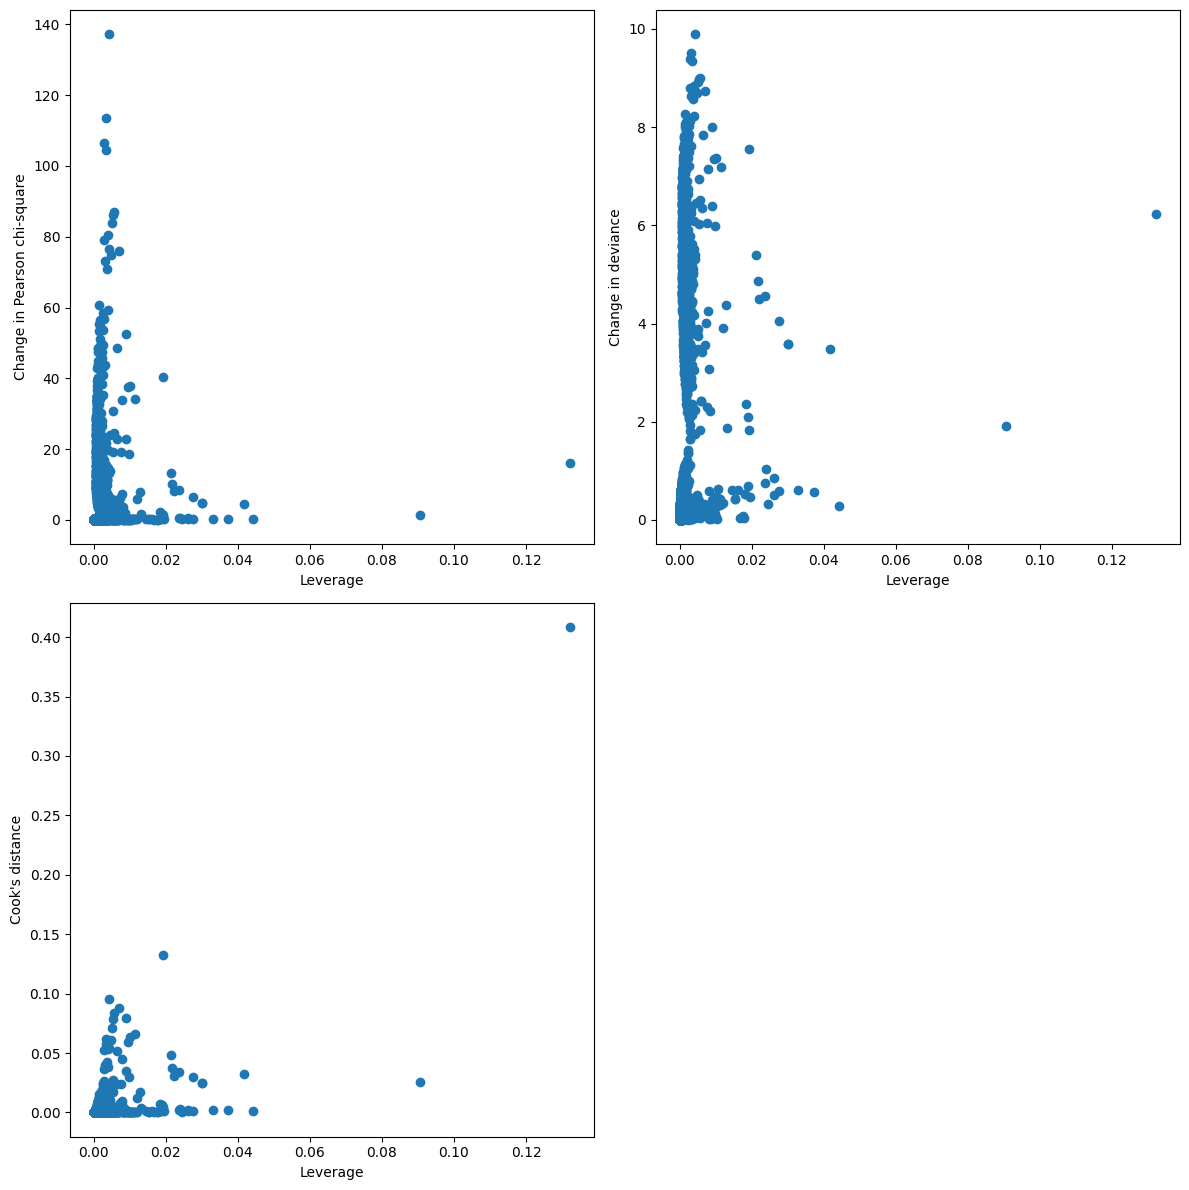

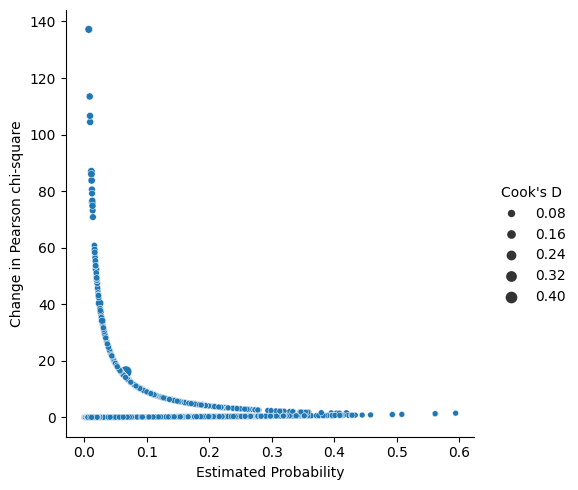


GLM Diagnostics for cluster 1.


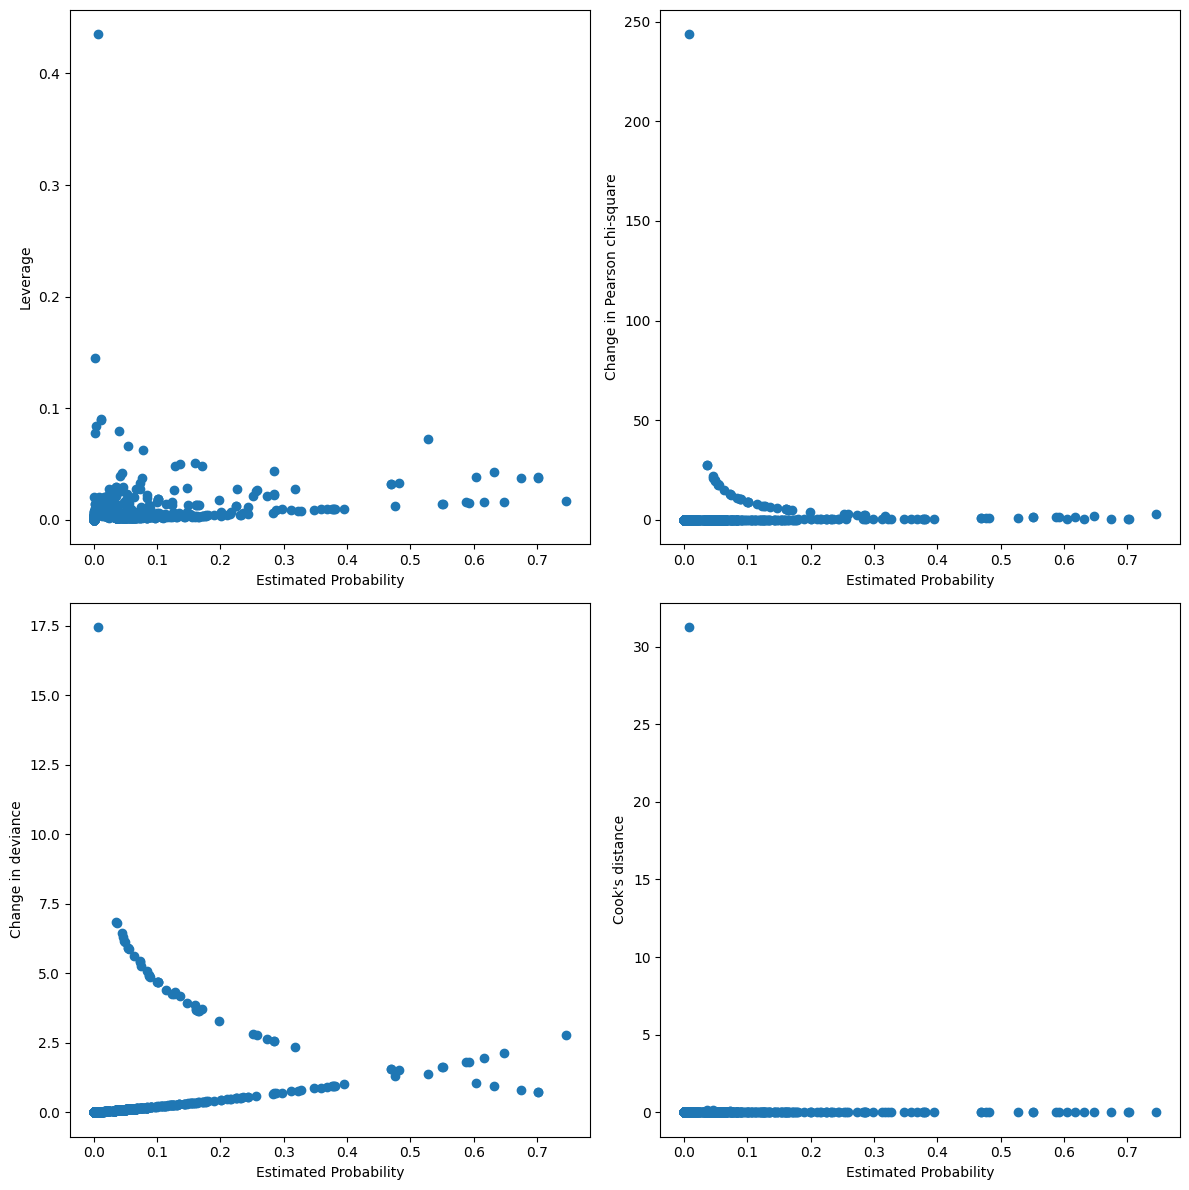

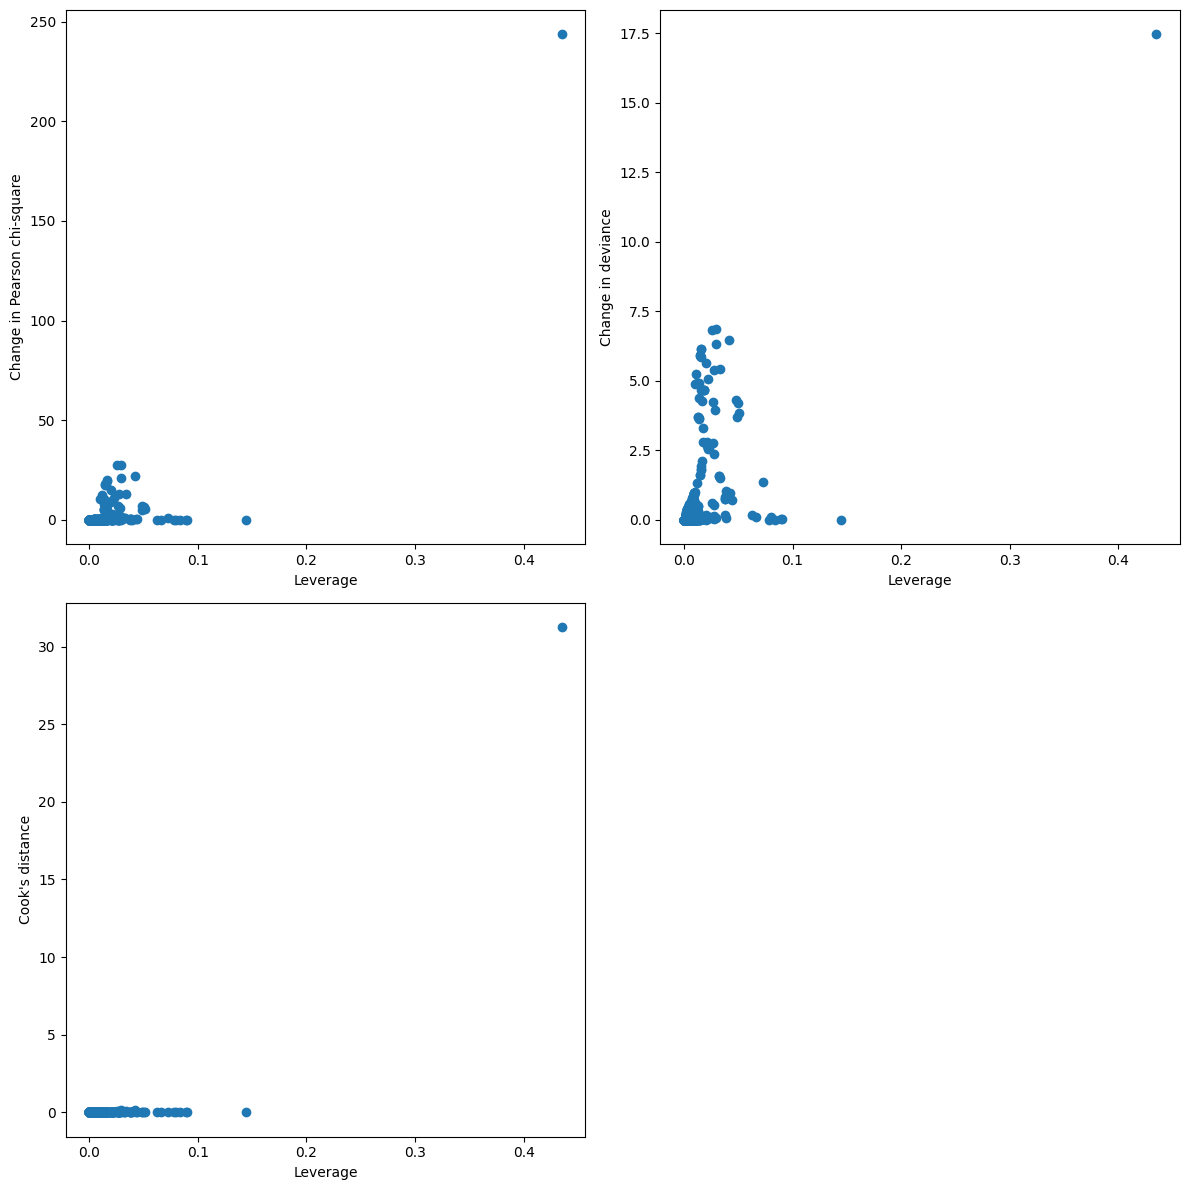

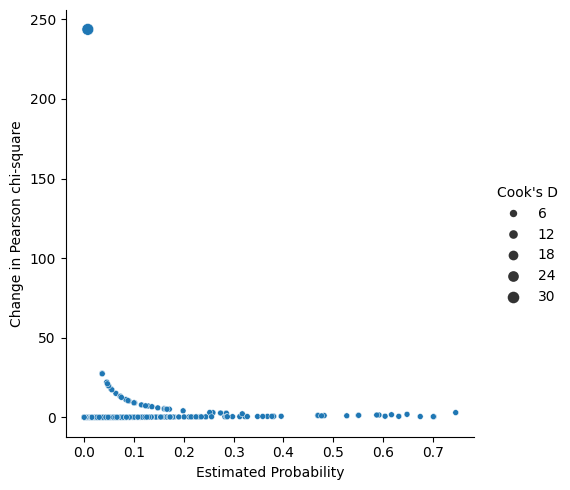


GLM Diagnostics for cluster 2.


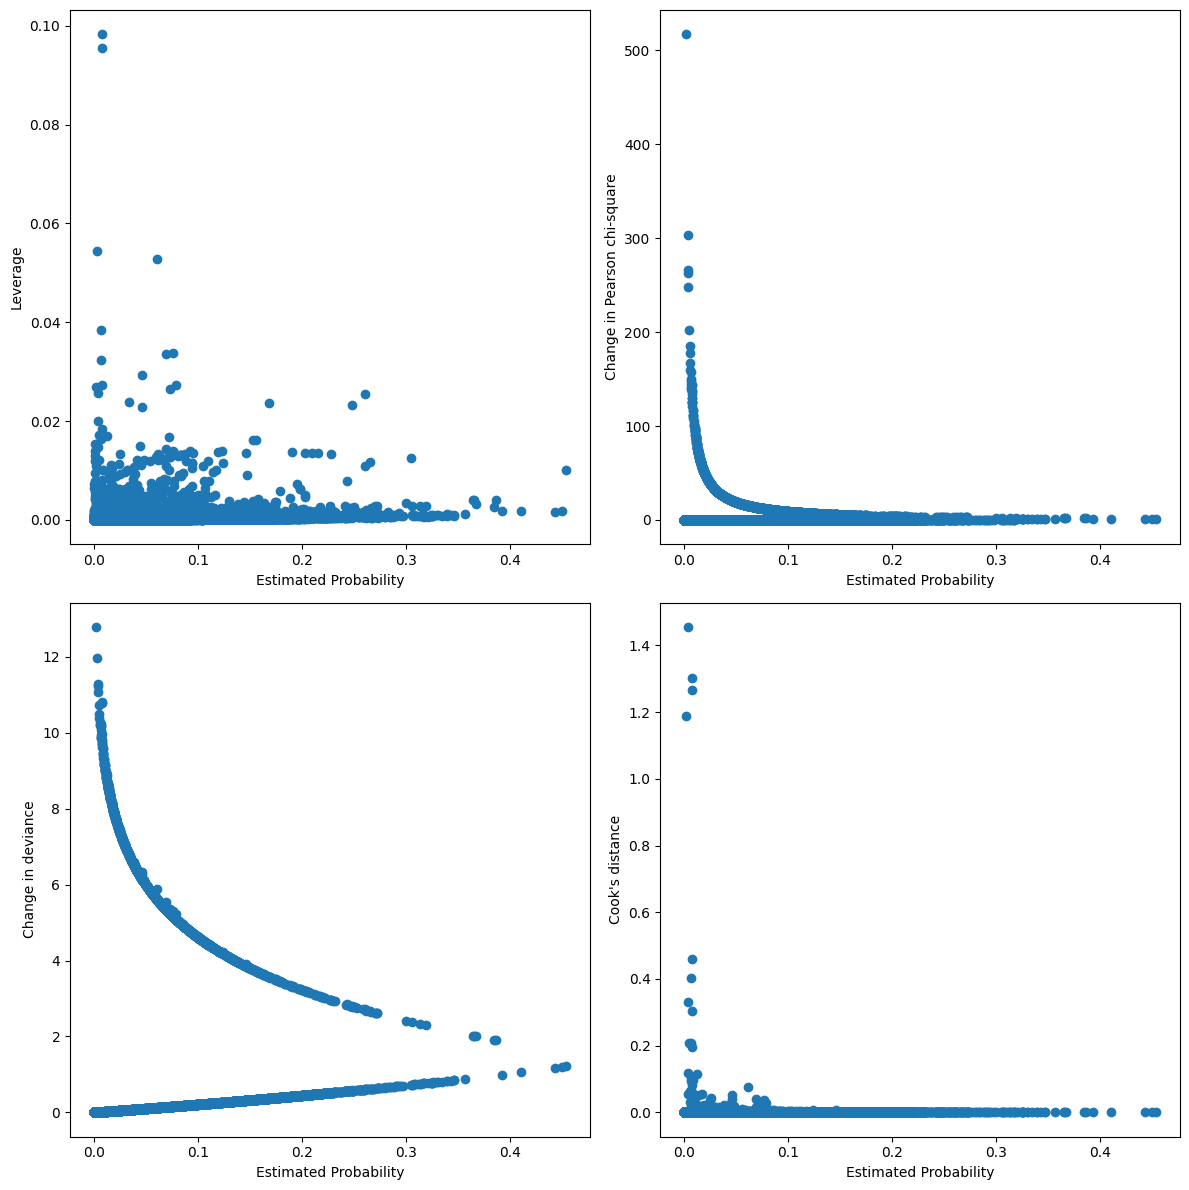

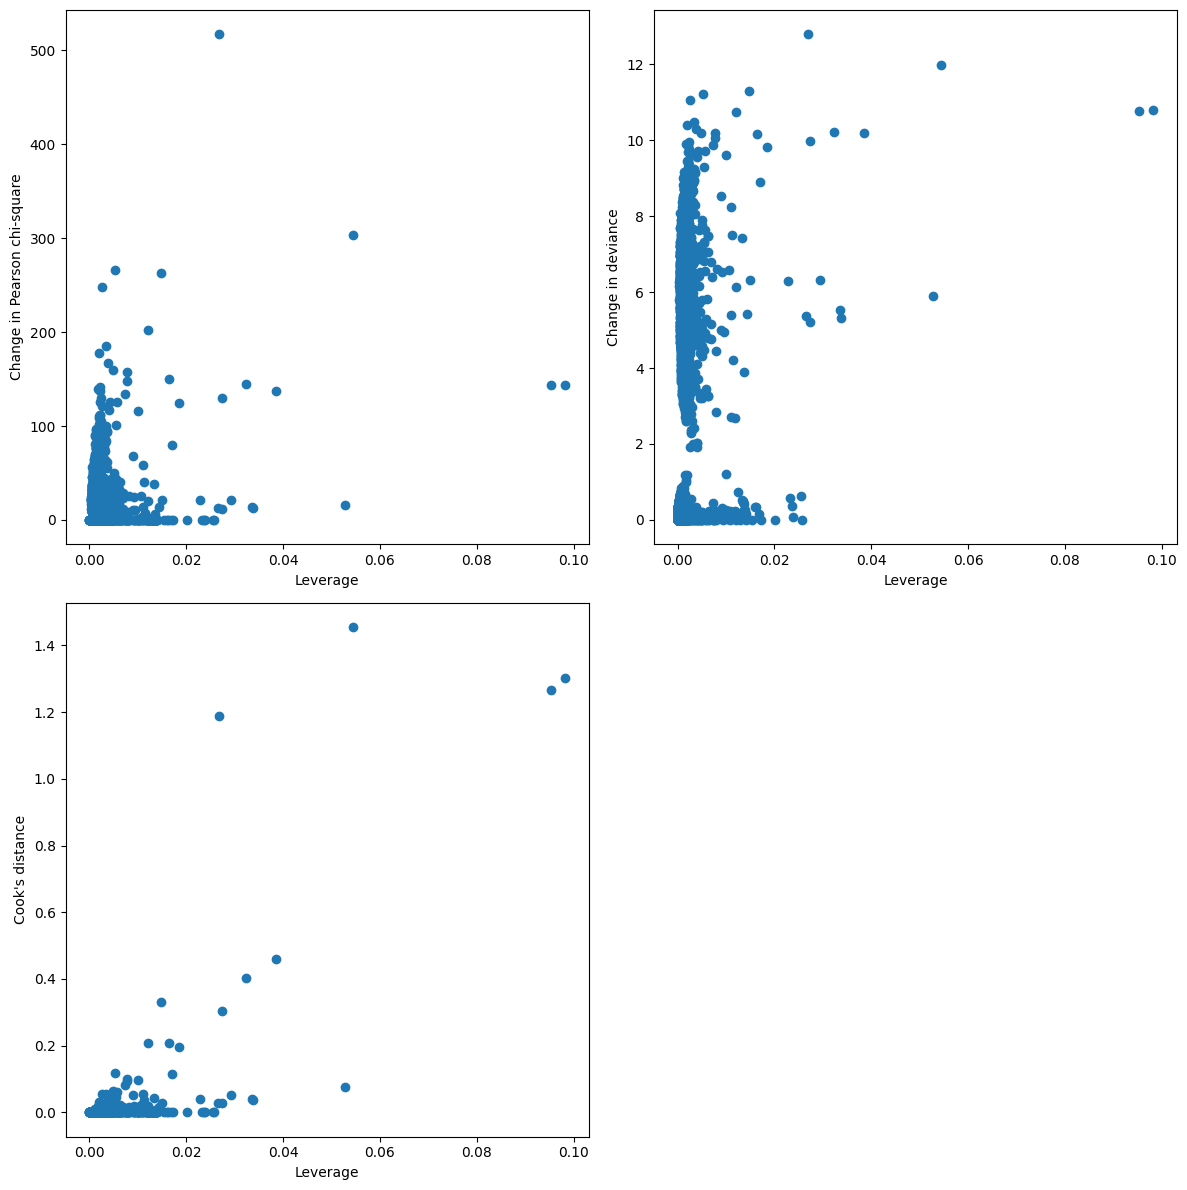

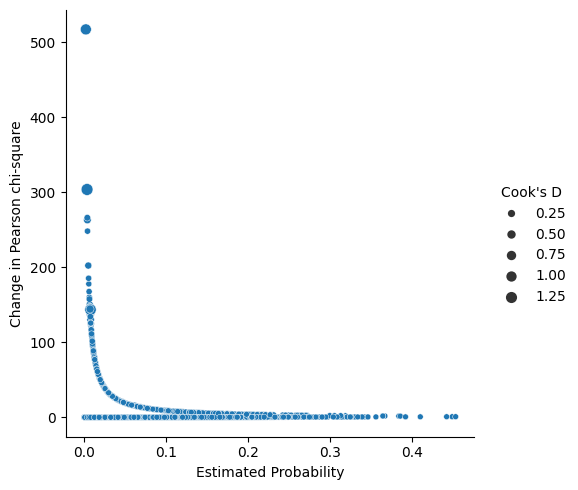

In [45]:
best_model.get_glm_diagnostic_plots_2(verbose=True, savefig=False, figloc=None)

In [30]:
best_model.get_glm_diagnostics_tests(Q=10)

Durbin-Watson statistic:  2.012624504152456 

Jarque-Bera test statistic: 136042.6142440087, Pvalue: 0.0, Skew: 3.5672334032876836, Kurtosis: 15.381071216379535

Omni Norm test statistic: 11587.027774648599, Pvalue: 0.0

Hosmer-Lemeshow Test for training set:


Cluster  df  chisq_value  pvalue
0        0   8      66.3225  0.0000
1        1   8      11.6589  0.1671
2        2   8      37.8014  0.0000

Hosmer-Lemeshow Test for validation set:


Cluster  df  chisq_value  pvalue
0        0   8      45.8736  0.0000
1        1   8      11.6134  0.1693
2        2   8      47.2919  0.0000

Hosmer-Lemeshow Test for validation set: 


Cluster  df  chisq_value  pvalue
0        0   8      12.9802  0.1125
1        1   8       6.2382  0.6206
2        2   8      19.6238  0.0119

Durbin-Watson statistic:  1.9779623572912033 

Jarque-Bera test statistic: 4536.069505593587, Pvalue: 0.0, Skew: 2.8588572211567795, Kurtosis: 13.10986829240605

Omni Norm test statistic: 511.68547879618643, Pvalue: 7.743013998081401e-112

Hosmer-Lemeshow Test for training set:


Cluster  df  chisq_value  pvalue
0        0   8      66.3225  0.0000
1        1   8      11.6589  0.1671
2        2   8      37.8014  0.0000

Hosmer-Lemeshow Test for validation set:


Cluster  df  chisq_value  pvalue
0        0   8      45.8736  0.0000
1        1   8      11.6134  0.1693
2        2   8      47.2919  0.0000

Hosmer-Lemeshow Test for validation set: 


Cluster  df  chisq_value  pvalue
0        0   8      12.9802  0.1125
1        1   8       6.2382  0.6206
2        2   8      19.6238  0.0119

Durbin-Watson statistic:  1.9875071711332288 

Jarque-Bera test statistic: 871694.1333891148, Pvalue: 0.0, Skew: 4.5496345175176085, Kurtosis: 23.036072313153714

Omni Norm test statistic: 38609.141523081824, Pvalue: 0.0

Hosmer-Lemeshow Test for training set:


Cluster  df  chisq_value  pvalue
0        0   8      66.3225  0.0000
1        1   8      11.6589  0.1671
2        2   8      37.8014  0.0000

Hosmer-Lemeshow Test for validation set:


Cluster  df  chisq_value  pvalue
0        0   8      45.8736  0.0000
1        1   8      11.6134  0.1693
2        2   8      47.2919  0.0000

Hosmer-Lemeshow Test for validation set: 


Cluster  df  chisq_value  pvalue
0        0   8      12.9802  0.1125
1        1   8       6.2382  0.6206
2        2   8      19.6238  0.0119

In [47]:
best_model.get_glm_cf_matrix()


Cluster 0 Training Confusion Matrix:
[[10107  5039]
 [  177   667]]

Cluster 0 Validation Confusion Matrix:
[[3412 1654]
 [  45  267]]

Cluster 0 Test Confusion Matrix:
[[3405 1758]
 [  53  236]]

Cluster 1 Training Confusion Matrix:
[[629 128]
 [ 11  39]]

Cluster 1 Validation Confusion Matrix:
[[222  39]
 [  0  13]]

Cluster 1 Test Confusion Matrix:
[[222  48]
 [  0   9]]

Cluster 2 Training Confusion Matrix:
[[28906 12674]
 [  447  1176]]

Cluster 2 Validation Confusion Matrix:
[[9629 4156]
 [ 123  440]]

Cluster 2 Test Confusion Matrix:
[[9489 4211]
 [ 160  409]]

Training Confusion Matrix:
[[39642 17841]
 [  635  1882]]

Validation Confusion Matrix:
[[13263  5849]
 [  168   720]]

Test Confusion Matrix:
[[13116  6017]
 [  213   654]]


In [48]:
best_model.get_glm_marginal_effects()


Cluster 0
         GLM Marginal Effects        
Dep. Variable:                  Claim
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Total_miles_driven            0.0234      0.002     11.176      0.000       0.019       0.028
I(Years_noclaims ** 3)       -0.0063      0.001     -6.709      0.000      -0.008      -0.004
I(Total_days_driven ** 3)     0.0104      0.001     10.193      0.000       0.008       0.012
I(Brake_09miles ** 2)         0.0104      0.003      4.104      0.000       0.005       0.015
I(Brake_11miles ** 3)        -0.0090      0.007     -1.250      0.211      -0.023       0.005

Cluster 1
         GLM Marginal Effects        
Dep. Variable:                  Claim
Method:                          dydx
At:                           overall
                

In [57]:
# Alternative PCA model

In [14]:
file = open('/Users/jameshannon/Desktop/Desktop - James’s MacBook Air (3)/Telematics_updated/clustering_files/clustering_results/full_3_pca', 'rb')

# dump information to that file
best_model_pca = joblib.load(file)#pickle.load(file)

# close the file
file.close()

In [61]:
metrics.confusion_matrix(y_true=best_model.clust_train_preds, y_pred=best_model_pca.clust_train_preds)

array([[ 8894,  5773,  1323],
       [   21,   114,   672],
       [28921, 14282,     0]])


Training set


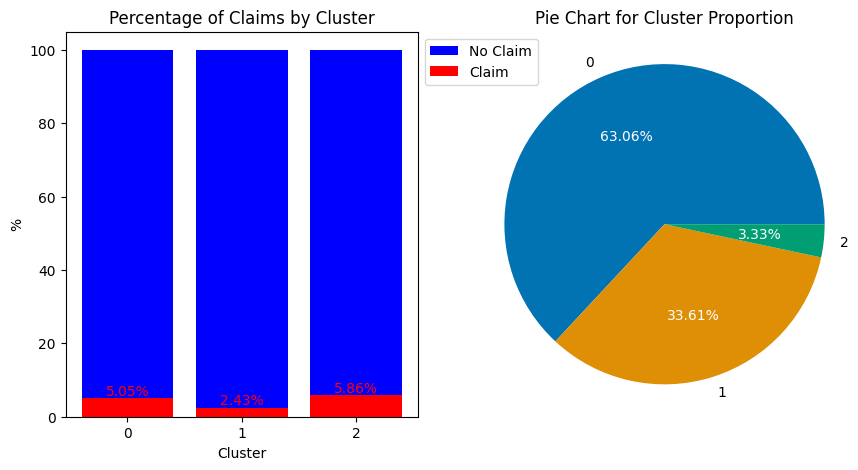


Validation set


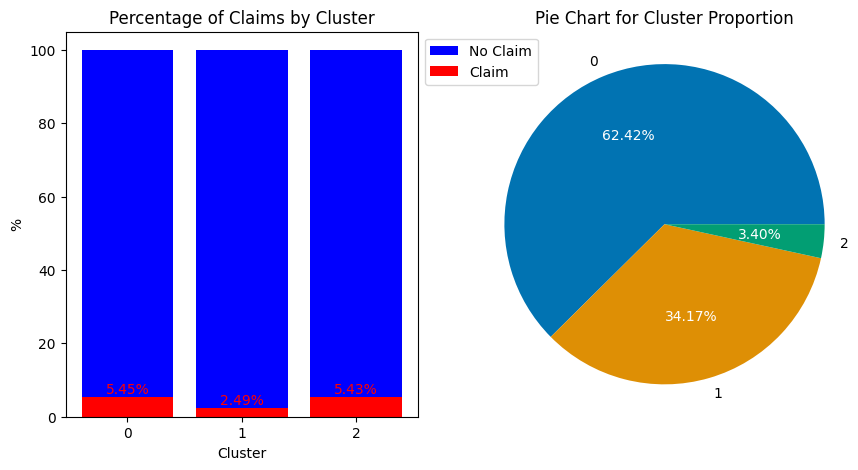


Test set


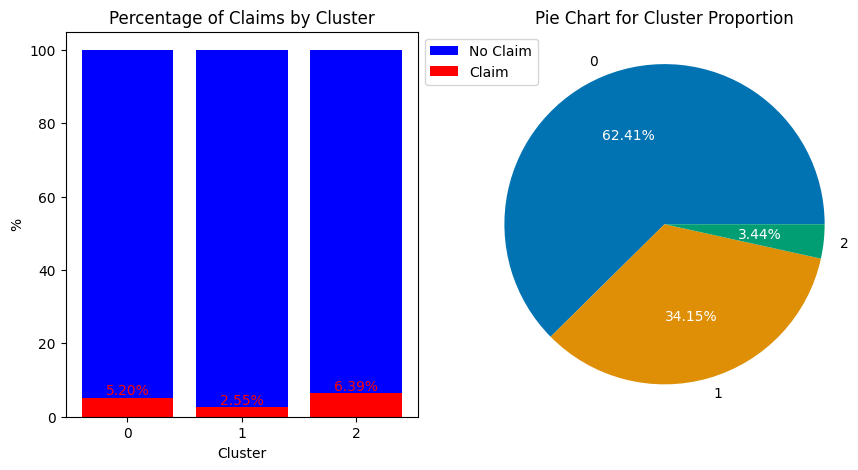

In [139]:
best_model_pca.get_gmm_claims_plots(verbose=True, savefig=True, figloc="../regression_files/regression_figures/best_model_figs/pca_")

In [67]:
a = np.round(best_model_pca.df_train[best_model_pca.clust_train_preds==0][sorted(best_model_pca.cluster_variables)].mean(),2)

b = np.round(best_model_pca.df_train[best_model_pca.clust_train_preds==1][sorted(best_model_pca.cluster_variables)].mean(),2)

c = np.round(best_model_pca.df_train[best_model_pca.clust_train_preds==2][sorted(best_model_pca.cluster_variables)].mean(),2)

In [ ]:
best_model.calibaration_plot(df,
                          verbose=True,
                          savefig=False,
                          figloc=None, 
                          figloc_name=None)